# K Means Clustering with Python

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
%matplotlib inline

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


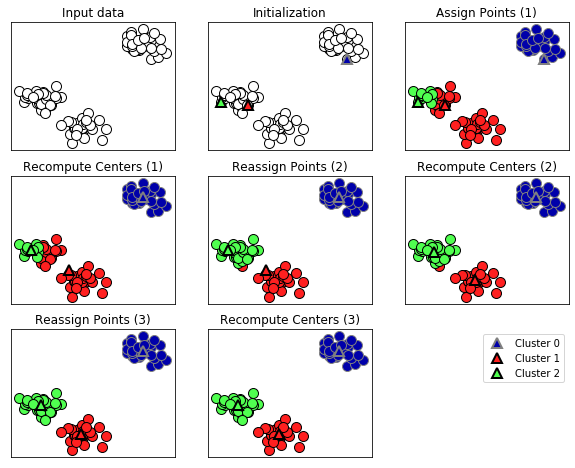

In [2]:
mglearn.plots.plot_kmeans_algorithm()

## Create some Data

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=100,random_state=101)

In [5]:
data

(array([[-1.46536528e+02,  1.33919806e+02],
        [ 1.23879942e+02, -7.53683791e+01],
        [-3.87876902e+01,  1.04242668e+02],
        [-8.17804505e+01,  1.66959491e+02],
        [ 8.09025436e+01,  3.60995999e+01],
        [-8.98956666e+01,  1.87852373e+01],
        [-8.91546877e+01,  1.78272954e+02],
        [-1.13336487e+02,  1.44999970e+00],
        [-1.37207028e+02,  9.37686389e+01],
        [-9.29957491e+01,  9.69190027e+01],
        [-1.33016594e+02,  1.07972482e+02],
        [-8.44797258e+01,  6.20098867e+01],
        [-4.08817386e+01,  7.52653137e+01],
        [-6.92410941e+01, -6.53330376e+01],
        [-8.24593345e+01,  1.05989206e+02],
        [-4.93824297e+01, -7.39936184e+01],
        [ 1.29695909e+02, -3.81118979e+01],
        [-1.46423429e+02, -4.79961841e+01],
        [-4.85394122e+01,  1.67778128e+02],
        [-4.16468249e+01,  2.03414250e+02],
        [-6.41565043e+01,  4.31031285e+01],
        [ 1.90404247e+01, -7.18711630e+01],
        [ 9.95853179e+01,  1.206

## Visualize Data

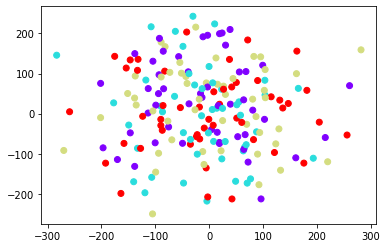

In [6]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [7]:
df = pd.DataFrame(data[0], columns = ['Feature 1', 'Feature 2'])
df['Category'] = data[1]
df.head()

,Feature 1,Feature 2,Category
0,-146.536528,133.919806,3
1,123.879942,-75.368379,2
2,-38.787690,104.242668,0
3,-81.780450,166.959491,2
4,80.902544,36.099600,2


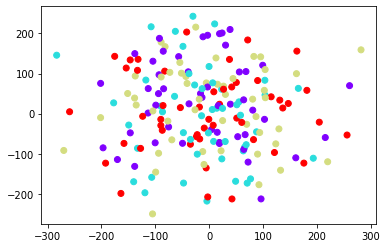

In [8]:
plt.scatter(df['Feature 1'], df['Feature 2'], c =df['Category'], cmap = 'rainbow')

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Feature 1', 'Feature 2']] = scaler.fit_transform(df[['Feature 1', 'Feature 2']])

## Creating the Clusters

In [10]:
for i in df['Category'].unique() :
    print (f'Category {i}')
    
    print(round(df[df['Category'] == i].drop('Category', axis =1).std(), 1))

Category 3
Feature 1    1.1
Feature 2    0.9
dtype: float64
Category 2
Feature 1    1.1
Feature 2    1.0
dtype: float64
Category 0
Feature 1    1.0
Feature 2    1.0
dtype: float64
Category 1
Feature 1    0.9
Feature 2    1.1
dtype: float64


In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=9, random_state = 5)

In [13]:
kmeans.fit(df[['Feature 1', 'Feature 2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [14]:
kmeans.cluster_centers_

array([[ 1.77288458, -0.92864397],
       [-1.06603178,  1.11545628],
       [-1.33956867, -1.34437239],
       [ 1.35139811,  0.64710553],
       [ 0.40497962, -1.71313752],
       [ 0.35237926, -0.61606021],
       [ 0.08011793,  1.70597987],
       [ 0.14180107,  0.37958402],
       [-1.0397237 , -0.05665   ]])

In [15]:
kmeans.labels_

array([1, 0, 7, 1, 3, 8, 1, 8, 1, 1, 1, 8, 7, 8, 1, 5, 0, 8, 6, 6, 8, 5,
       3, 2, 2, 5, 4, 5, 7, 5, 7, 5, 5, 4, 8, 8, 1, 1, 2, 2, 7, 5, 3, 6,
       7, 0, 7, 3, 2, 2, 0, 8, 0, 5, 3, 0, 6, 7, 4, 7, 5, 8, 3, 3, 1, 2,
       8, 5, 7, 7, 1, 6, 7, 4, 7, 5, 6, 7, 1, 1, 1, 7, 3, 3, 5, 8, 2, 8,
       2, 6, 4, 5, 6, 0, 6, 5, 3, 5, 7, 0, 1, 8, 7, 2, 8, 1, 7, 3, 5, 7,
       3, 5, 5, 1, 4, 5, 7, 1, 8, 3, 6, 5, 8, 8, 7, 5, 1, 2, 5, 5, 5, 7,
       7, 4, 1, 5, 4, 4, 6, 5, 5, 4, 7, 3, 3, 8, 1, 5, 5, 8, 6, 3, 7, 5,
       4, 8, 2, 1, 7, 5, 7, 5, 1, 2, 8, 2, 8, 3, 7, 0, 7, 7, 8, 0, 6, 2,
       7, 8, 0, 8, 7, 4, 5, 3, 7, 4, 6, 5, 2, 5, 7, 3, 7, 5, 7, 6, 3, 3,
       7, 5])

In [16]:
kmeans.predict(df[['Feature 1', 'Feature 2']])

array([1, 0, 7, 1, 3, 8, 1, 8, 1, 1, 1, 8, 7, 8, 1, 5, 0, 8, 6, 6, 8, 5,
       3, 2, 2, 5, 4, 5, 7, 5, 7, 5, 5, 4, 8, 8, 1, 1, 2, 2, 7, 5, 3, 6,
       7, 0, 7, 3, 2, 2, 0, 8, 0, 5, 3, 0, 6, 7, 4, 7, 5, 8, 3, 3, 1, 2,
       8, 5, 7, 7, 1, 6, 7, 4, 7, 5, 6, 7, 1, 1, 1, 7, 3, 3, 5, 8, 2, 8,
       2, 6, 4, 5, 6, 0, 6, 5, 3, 5, 7, 0, 1, 8, 7, 2, 8, 1, 7, 3, 5, 7,
       3, 5, 5, 1, 4, 5, 7, 1, 8, 3, 6, 5, 8, 8, 7, 5, 1, 2, 5, 5, 5, 7,
       7, 4, 1, 5, 4, 4, 6, 5, 5, 4, 7, 3, 3, 8, 1, 5, 5, 8, 6, 3, 7, 5,
       4, 8, 2, 1, 7, 5, 7, 5, 1, 2, 8, 2, 8, 3, 7, 0, 7, 7, 8, 0, 6, 2,
       7, 8, 0, 8, 7, 4, 5, 3, 7, 4, 6, 5, 2, 5, 7, 3, 7, 5, 7, 6, 3, 3,
       7, 5])

In [17]:
dfKmeans = pd.DataFrame(data[0], columns = ['Feature 1', 'Feature 2'])
dfKmeans['Category'] = kmeans.labels_
dfKmeans.head()

,Feature 1,Feature 2,Category
0,-1.358189,1.154213,1
1,1.267453,-0.824089,0
2,-0.311989,0.873689,7
3,-0.729432,1.466522,1
4,0.850159,0.229565,3


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df['Category'], dfKmeans['Category']))
print(classification_report(df['Category'], dfKmeans['Category']))

[[ 2  7  4  3  2 10  6  9  7]
 [ 1  3  4  3  6 11  4 13  5]
 [ 4  7  4  8  2  7  2  9  7]
 [ 4  6  4  7  3 10  3  6  7]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.18      0.04      0.07        50
           1       0.13      0.06      0.08        50
           2       0.25      0.08      0.12        50
           3       0.33      0.14      0.20        50
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.08       200
   macro avg       0.10      0.04      0.05       200
weighted avg       0.22      0.08      0.12       200



C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[]

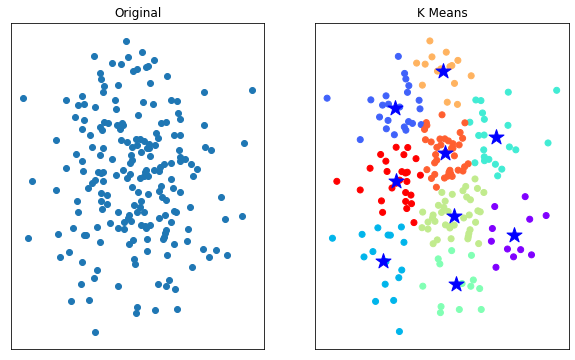

In [26]:
centroids = kmeans.cluster_centers_
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax2.set_title('K Means')
ax2.scatter(dfKmeans['Feature 1'], dfKmeans['Feature 2'], c =dfKmeans['Category'], cmap = 'rainbow')
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='b', s=250)
ax2.set_xticks([])
ax2.set_yticks([])

ax1.set_title("Original")
ax1.scatter(df['Feature 1'], df['Feature 2'])
ax1.set_xticks([])
ax1.set_yticks([])


You should note, the colors are meaningless in reference between the two plots.

## Evaluation with Elbow Method

In [20]:
inertia_list = []

for i in range(1,150):
    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Feature 1', 'Feature 2']])
    inertia_list.append(kmeans.inertia_)

Inertia adalah total dari jarak setiap sampel ke centroidnya (Default Euclidean Distance), semakin kecil semakin bagus

Text(0, 0.5, 'Inertia')

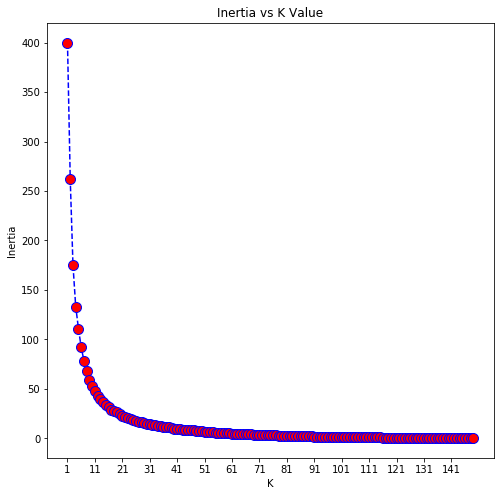

In [21]:
plt.figure(figsize = (8,8))
plt.plot(range(1,150), inertia_list, color = 'blue', linestyle = 'dashed', marker ='o', markerfacecolor = 'red',
         markersize = 10)
plt.title('Inertia vs K Value')
plt.xticks(range(1,150, 10))
plt.xlabel('K')
plt.ylabel('Inertia')

## Evaluation with Silhoutte Index

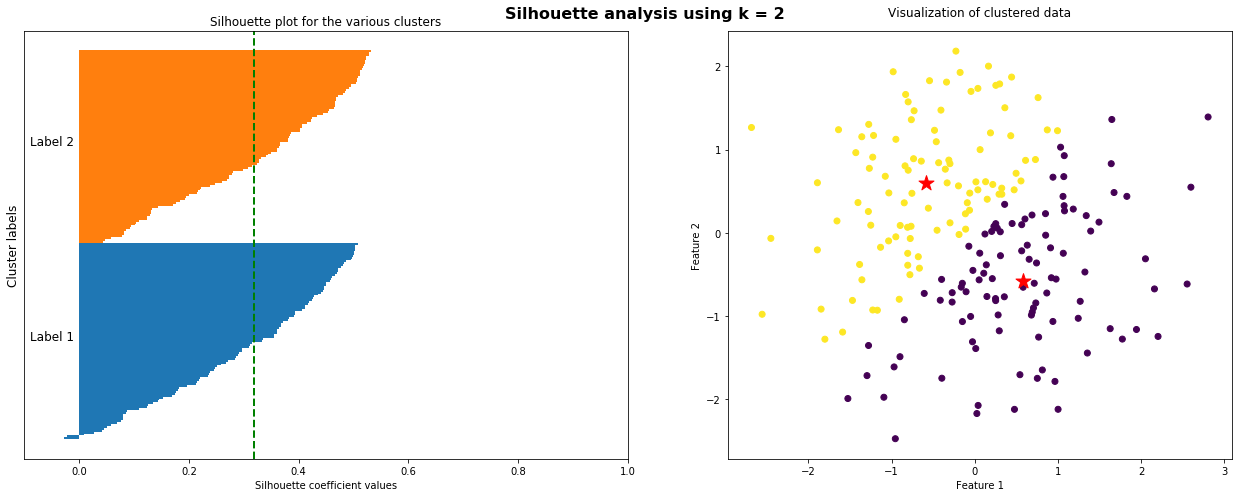

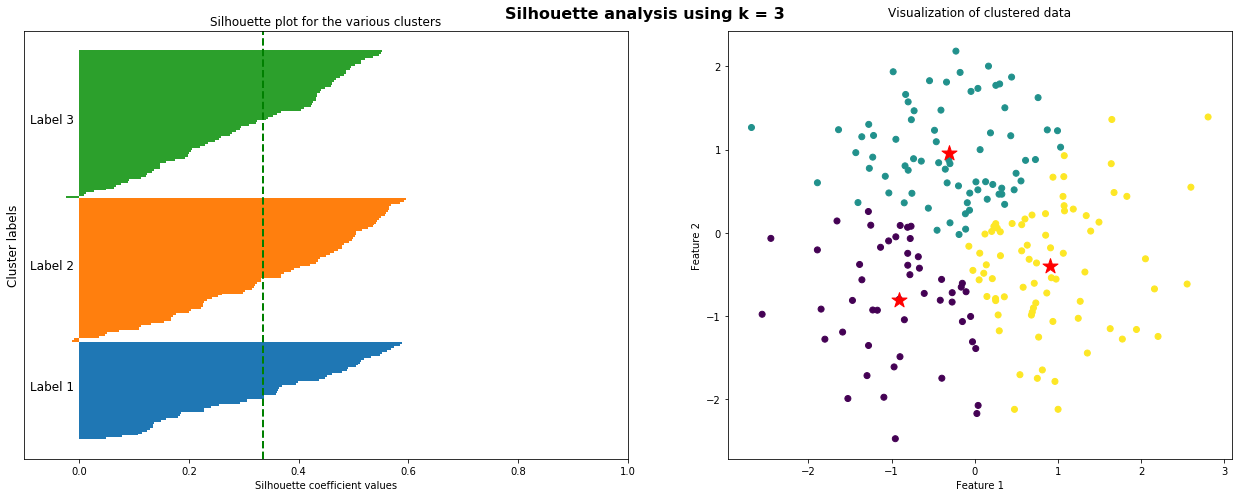

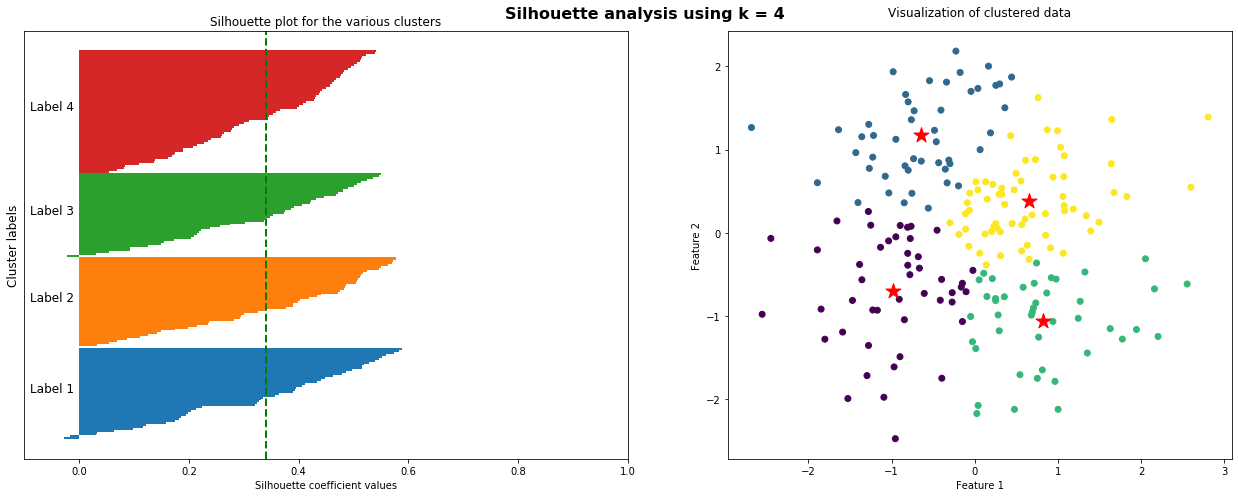

In [22]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate(list(range(2,5))):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df[['Feature 1', 'Feature 2']])
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df[['Feature 1', 'Feature 2']], labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.09, (y_lower + y_upper) / 2, 'Label '+str(i + 1), fontsize = 12)
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels', fontsize = 12)
    ax1.set_title('Silhouette plot for the various clusters');
    
    
    # Scatter plot of data colored with labels
    ax2.scatter(df['Feature 1'], df['Feature 2'], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle('Silhouette analysis using k = {}'.format(k),
                 fontsize=16, fontweight='semibold');

In [23]:
np.mean(silhouette_samples(df[['Feature 1', 'Feature 2']], labels))

0.34138264972424764

In [24]:
silhouette_samples(df[['Feature 1', 'Feature 2']], labels)

array([ 5.07090765e-01,  3.92565245e-01,  3.26370200e-01,  5.72108359e-01,
        4.95302638e-01,  1.97646555e-01,  5.70833506e-01,  3.64505789e-01,
        3.98315959e-01,  5.08452688e-01,  4.72250932e-01,  2.82564313e-01,
        1.74389179e-01,  4.62764149e-01,  5.17820567e-01,  3.27576778e-01,
        1.54840801e-01,  5.45790188e-01,  5.04440973e-01,  4.74667217e-01,
        1.11739144e-01,  3.38487626e-01,  4.29491049e-01,  3.95350707e-01,
        5.73534772e-01,  2.23077861e-01,  5.24692682e-01,  3.01585365e-01,
        1.74157873e-01,  4.05712797e-01,  5.00635815e-01,  2.56584943e-01,
        5.14308044e-01,  4.81383474e-01,  2.35788129e-01,  4.48332184e-01,
        5.25345950e-01,  3.90390509e-01,  4.33393209e-01,  1.82588799e-01,
        4.27407898e-01,  2.14353827e-01,  3.59509680e-01,  1.36319194e-01,
        2.60352861e-01,  1.49012564e-01,  2.58212899e-01,  4.39060552e-01,
        5.87835217e-01,  3.92647800e-01,  4.30847929e-01,  5.16034556e-01,
        5.05593411e-01,  

In [25]:
cluster_silhouette_vals

array([0.05401805, 0.06927758, 0.08261746, 0.08412935, 0.10964509,
       0.13631919, 0.13863757, 0.16273339, 0.16942992, 0.17250529,
       0.17415787, 0.18888366, 0.18952039, 0.20799898, 0.21435383,
       0.22698659, 0.23565683, 0.24085911, 0.2582129 , 0.26035286,
       0.26450065, 0.27610488, 0.27794095, 0.28148434, 0.29057791,
       0.30036568, 0.31045174, 0.34385469, 0.34392725, 0.34681428,
       0.35387897, 0.35950968, 0.36555089, 0.39670415, 0.40054785,
       0.40828967, 0.4143663 , 0.4274079 , 0.42949105, 0.43226724,
       0.43760409, 0.43906055, 0.44218532, 0.44925216, 0.457523  ,
       0.45799455, 0.4615177 , 0.46462527, 0.46869284, 0.47578684,
       0.47752808, 0.48101025, 0.48320154, 0.48959091, 0.49530264,
       0.50063581, 0.50618352, 0.51231109, 0.5141616 , 0.51595369,
       0.52281892, 0.53951313, 0.54169753])

## DBSCAN

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
dbscan = DBSCAN(eps=0.40, min_samples = 4).fit(df[['Feature 1', 'Feature 2']])

In [28]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  2,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,
        0,  0,  0, -1,  0,  0,  0,  0,  2,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [29]:
dbscan.components_

array([[-1.35818944,  1.1542133 ],
       [ 1.26745321, -0.82408857],
       [-0.31198858,  0.87368941],
       [-0.72943218,  1.46652177],
       [ 0.85015876,  0.22956533],
       [-0.80822789,  0.06590088],
       [-0.80103326,  1.57346256],
       [-1.03582947, -0.09796089],
       [-1.26760349,  0.77468338],
       [-0.83832853,  0.80446228],
       [-1.22691594,  0.90894557],
       [-0.75564113,  0.47448297],
       [-0.332321  ,  0.59978023],
       [-0.60767972, -0.72922925],
       [-0.73602389,  0.8901986 ],
       [-0.41485953, -0.81109361],
       [ 1.32392407, -0.47192073],
       [-1.35709129, -0.5653522 ],
       [-0.40667415,  1.47425995],
       [-0.33974971,  1.8111113 ],
       [-0.55831026,  0.29576636],
       [ 0.24950076, -0.79103104],
       [ 1.03156151,  1.02866117],
       [-0.97012721, -1.61275506],
       [-1.47046592, -0.81341021],
       [ 0.92044586, -0.54074967],
       [ 0.75189617, -1.75000942],
       [ 0.58126795, -0.65506156],
       [ 0.01389933,

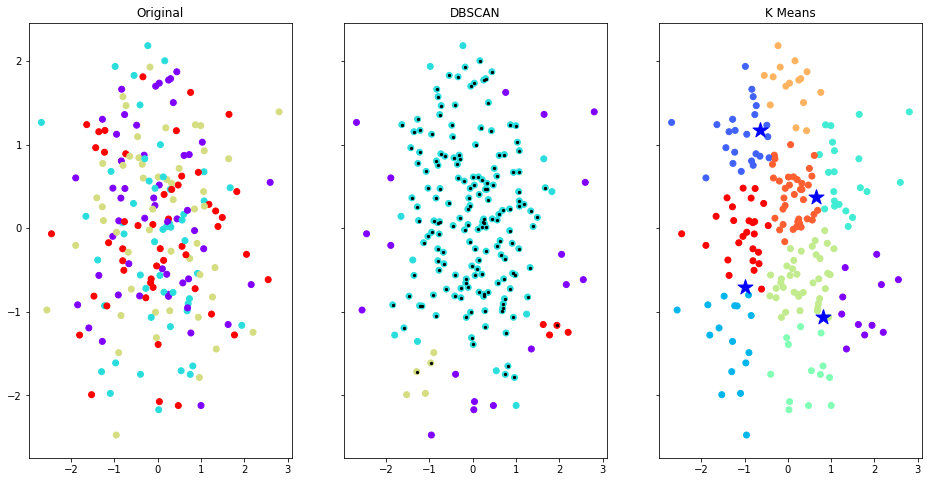

In [30]:
dfDBSCAN = df.copy()
dfDBSCAN['Category'] = dbscan.labels_

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(16,8))

ax1.set_title("Original")
ax1.scatter(df['Feature 1'], df['Feature 2'], c =df['Category'], cmap = 'rainbow')

core = dbscan.components_
ax2.set_title('DBSCAN')
ax2.scatter(dfDBSCAN['Feature 1'], dfDBSCAN['Feature 2'], c =dfDBSCAN['Category'], cmap = 'rainbow')
ax2.scatter(core[:, 0], core[:, 1], marker='o', c='black', s=5)

ax3.set_title('K Means')
ax3.scatter(dfKmeans['Feature 1'], dfKmeans['Feature 2'], c =dfKmeans['Category'], cmap = 'rainbow')
ax3.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='b', s=250)


In [31]:
from sklearn.metrics import silhouette_score
score = []

for num in range(2, 20):
    for eps in np.linspace(0.1, 1, 1000): 
        dbscan = DBSCAN(eps=eps, min_samples = num).fit(df[['Feature 1', 'Feature 2']])
        labels = dbscan.labels_
        try:
            s_score = silhouette_score(df[['Feature 1', 'Feature 2']], labels)
            print('Average Silhoutte Score for eps = {} and min samples {} is {}'.format(eps, num, s_score))
            score.append({'min_sample': num, 'epsilon': eps, 'score': s_score})
        except:
            print('eps = {} and min samples {} result in only 1 Label'.format(eps, num))

Average Silhoutte Score for eps = 0.1 and min samples 2 is -0.3070207425252354
Average Silhoutte Score for eps = 0.10090090090090091 and min samples 2 is -0.3070207425252354
Average Silhoutte Score for eps = 0.1018018018018018 and min samples 2 is -0.3070207425252354
Average Silhoutte Score for eps = 0.10270270270270271 and min samples 2 is -0.29627287693833104
Average Silhoutte Score for eps = 0.10360360360360361 and min samples 2 is -0.29627287693833104
Average Silhoutte Score for eps = 0.1045045045045045 and min samples 2 is -0.29627287693833104
Average Silhoutte Score for eps = 0.10540540540540541 and min samples 2 is -0.29101960254613113
Average Silhoutte Score for eps = 0.10630630630630632 and min samples 2 is -0.284395594962395
Average Silhoutte Score for eps = 0.10720720720720721 and min samples 2 is -0.2778077961208797
Average Silhoutte Score for eps = 0.10810810810810811 and min samples 2 is -0.2635803961927104
Average Silhoutte Score for eps = 0.10900900900900902 and min sam

Average Silhoutte Score for eps = 0.2018018018018018 and min samples 2 is -0.03327834190000149
Average Silhoutte Score for eps = 0.20270270270270271 and min samples 2 is -0.03229673610585528
Average Silhoutte Score for eps = 0.2036036036036036 and min samples 2 is -0.03229673610585528
Average Silhoutte Score for eps = 0.20450450450450453 and min samples 2 is -0.03091829087162397
Average Silhoutte Score for eps = 0.20540540540540542 and min samples 2 is -0.0031663349419845943
Average Silhoutte Score for eps = 0.2063063063063063 and min samples 2 is 0.007070840720112814
Average Silhoutte Score for eps = 0.2072072072072072 and min samples 2 is 0.007070840720112814
Average Silhoutte Score for eps = 0.20810810810810812 and min samples 2 is 0.007070840720112814
Average Silhoutte Score for eps = 0.209009009009009 and min samples 2 is 0.007070840720112814
Average Silhoutte Score for eps = 0.20990990990990993 and min samples 2 is -0.02366916655021146
Average Silhoutte Score for eps = 0.21081081

Average Silhoutte Score for eps = 0.2918918918918919 and min samples 2 is -0.20238923872239364
Average Silhoutte Score for eps = 0.2927927927927928 and min samples 2 is -0.2045239687062425
Average Silhoutte Score for eps = 0.2936936936936937 and min samples 2 is -0.2045239687062425
Average Silhoutte Score for eps = 0.2945945945945946 and min samples 2 is -0.1831756561925711
Average Silhoutte Score for eps = 0.2954954954954955 and min samples 2 is -0.1831756561925711
Average Silhoutte Score for eps = 0.29639639639639637 and min samples 2 is -0.1831756561925711
Average Silhoutte Score for eps = 0.2972972972972973 and min samples 2 is -0.1831756561925711
Average Silhoutte Score for eps = 0.2981981981981982 and min samples 2 is -0.1831756561925711
Average Silhoutte Score for eps = 0.2990990990990991 and min samples 2 is -0.1831756561925711
Average Silhoutte Score for eps = 0.30000000000000004 and min samples 2 is -0.1831756561925711
Average Silhoutte Score for eps = 0.30090090090090094 and

Average Silhoutte Score for eps = 0.38468468468468464 and min samples 2 is 0.05595451669135483
Average Silhoutte Score for eps = 0.38558558558558564 and min samples 2 is 0.05595451669135483
Average Silhoutte Score for eps = 0.38648648648648654 and min samples 2 is 0.05595451669135483
Average Silhoutte Score for eps = 0.3873873873873874 and min samples 2 is 0.05595451669135483
Average Silhoutte Score for eps = 0.3882882882882883 and min samples 2 is 0.05595451669135483
Average Silhoutte Score for eps = 0.3891891891891892 and min samples 2 is 0.05595451669135483
Average Silhoutte Score for eps = 0.3900900900900901 and min samples 2 is 0.05595451669135483
Average Silhoutte Score for eps = 0.390990990990991 and min samples 2 is 0.05595451669135483
Average Silhoutte Score for eps = 0.3918918918918919 and min samples 2 is 0.048825620672605555
Average Silhoutte Score for eps = 0.3927927927927928 and min samples 2 is 0.048825620672605555
Average Silhoutte Score for eps = 0.39369369369369367 an

Average Silhoutte Score for eps = 0.4657657657657658 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.4666666666666667 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.46756756756756757 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.46846846846846846 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.46936936936936935 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.47027027027027024 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.47117117117117113 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.47207207207207214 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.472972972972973 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.4738738738738739 and min samples 2 is 0.204737475395624
Average Silhoutte Score for eps = 0.4747747747747748 and min samples 2 is 0

Average Silhoutte Score for eps = 0.554954954954955 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.5558558558558558 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.5567567567567567 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.5576576576576576 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.5585585585585586 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.5594594594594595 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.5603603603603604 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.5612612612612613 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.5621621621621622 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.5630630630630631 and min samples 2 is 0.406797842625679
Average Silhoutte Score for eps = 0.563963963963964 and min samples 2 is 0.406797

Average Silhoutte Score for eps = 0.6405405405405405 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6414414414414414 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6423423423423423 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6432432432432432 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6441441441441441 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.645045045045045 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6459459459459459 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6468468468468468 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6477477477477477 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6486486486486487 and min samples 2 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6495495495495496 and min 

Average Silhoutte Score for eps = 0.7378378378378379 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7387387387387387 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7396396396396396 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7405405405405405 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7414414414414414 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7423423423423423 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7432432432432432 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7441441441441441 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.745045045045045 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.745945945945946 and min samples 2 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7468468468468469 and min s

Average Silhoutte Score for eps = 0.8288288288288288 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8297297297297297 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8306306306306306 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8315315315315315 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8324324324324324 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8333333333333334 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8342342342342343 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8351351351351352 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.836036036036036 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8369369369369369 and min samples 2 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8378378378378378 and min samples 2 

Average Silhoutte Score for eps = 0.9207207207207208 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9216216216216216 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9225225225225225 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9234234234234234 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9243243243243243 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9252252252252252 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9261261261261261 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.927027027027027 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9279279279279279 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9288288288288288 and min samples 2 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9297297297297297 and min 

Average Silhoutte Score for eps = 0.11081081081081082 and min samples 3 is -0.3691806010199493
Average Silhoutte Score for eps = 0.11171171171171172 and min samples 3 is -0.3622830215252721
Average Silhoutte Score for eps = 0.11261261261261261 and min samples 3 is -0.3550230404171154
Average Silhoutte Score for eps = 0.11351351351351352 and min samples 3 is -0.3550230404171154
Average Silhoutte Score for eps = 0.11441441441441443 and min samples 3 is -0.3550230404171154
Average Silhoutte Score for eps = 0.11531531531531532 and min samples 3 is -0.3550230404171154
Average Silhoutte Score for eps = 0.11621621621621622 and min samples 3 is -0.35064294368407756
Average Silhoutte Score for eps = 0.11711711711711711 and min samples 3 is -0.3418190714591289
Average Silhoutte Score for eps = 0.11801801801801802 and min samples 3 is -0.3418190714591289
Average Silhoutte Score for eps = 0.11891891891891893 and min samples 3 is -0.3418190714591289
Average Silhoutte Score for eps = 0.1198198198198

Average Silhoutte Score for eps = 0.209009009009009 and min samples 3 is -0.09630675159533436
Average Silhoutte Score for eps = 0.20990990990990993 and min samples 3 is -0.11180949260820582
Average Silhoutte Score for eps = 0.21081081081081082 and min samples 3 is -0.10098636539040118
Average Silhoutte Score for eps = 0.21171171171171171 and min samples 3 is -0.10098636539040118
Average Silhoutte Score for eps = 0.2126126126126126 and min samples 3 is -0.10098636539040118
Average Silhoutte Score for eps = 0.21351351351351353 and min samples 3 is -0.10098636539040118
Average Silhoutte Score for eps = 0.21441441441441442 and min samples 3 is -0.09167480526067694
Average Silhoutte Score for eps = 0.21531531531531534 and min samples 3 is -0.09167480526067694
Average Silhoutte Score for eps = 0.21621621621621623 and min samples 3 is -0.09167480526067694
Average Silhoutte Score for eps = 0.21711711711711712 and min samples 3 is -0.09167480526067694
Average Silhoutte Score for eps = 0.2180180

Average Silhoutte Score for eps = 0.3072072072072072 and min samples 3 is -0.16024881631464402
Average Silhoutte Score for eps = 0.3081081081081081 and min samples 3 is -0.16024881631464402
Average Silhoutte Score for eps = 0.309009009009009 and min samples 3 is -0.09324541069937965
Average Silhoutte Score for eps = 0.3099099099099099 and min samples 3 is -0.09324541069937965
Average Silhoutte Score for eps = 0.31081081081081086 and min samples 3 is -0.09324541069937965
Average Silhoutte Score for eps = 0.31171171171171175 and min samples 3 is -0.09441039577990434
Average Silhoutte Score for eps = 0.31261261261261264 and min samples 3 is -0.09441039577990434
Average Silhoutte Score for eps = 0.31351351351351353 and min samples 3 is -0.09441039577990434
Average Silhoutte Score for eps = 0.3144144144144144 and min samples 3 is -0.09441039577990434
Average Silhoutte Score for eps = 0.3153153153153153 and min samples 3 is -0.09441039577990434
Average Silhoutte Score for eps = 0.31621621621

Average Silhoutte Score for eps = 0.4045045045045045 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.4054054054054054 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.40630630630630626 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.40720720720720727 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.40810810810810816 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.40900900900900905 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.40990990990990994 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.41081081081081083 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.4117117117117117 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.4126126126126126 and min samples 3 is 0.1978158455740742
Average Silhoutte Score for eps = 0.4135135135135135 and min sam

Average Silhoutte Score for eps = 0.5045045045045046 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.5054054054054055 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.5063063063063064 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.5072072072072072 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.5081081081081081 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.509009009009009 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.5099099099099099 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.5108108108108108 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.5117117117117117 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.5126126126126126 and min samples 3 is 0.204737475395624
Average Silhoutte Score for eps = 0.5135135135135135 and min samples 3 is 0.20473

Average Silhoutte Score for eps = 0.6 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6009009009009009 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6018018018018018 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6027027027027027 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6036036036036035 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6045045045045044 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6054054054054054 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6063063063063063 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6072072072072072 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6081081081081081 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.609009009009009 and min samples 3 is 0.

Average Silhoutte Score for eps = 0.6954954954954955 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6963963963963964 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6972972972972973 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6981981981981982 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6990990990990991 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.7 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.7009009009009008 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.7018018018018017 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.7027027027027027 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.7036036036036036 and min samples 3 is 0.42118629899188575
Average Silhoutte Score for eps = 0.7045045045045045 and min samples 3 is 0

Average Silhoutte Score for eps = 0.790990990990991 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.7918918918918919 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.7927927927927928 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.7936936936936937 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.7945945945945946 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.7954954954954955 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.7963963963963964 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.7972972972972973 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.7981981981981981 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.799099099099099 and min samples 3 is 0.4419488454097758
Average Silhoutte Score for eps = 0.7999999999999999 and min samples 3 i

Average Silhoutte Score for eps = 0.8855855855855855 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.8864864864864864 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.8873873873873874 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.8882882882882883 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.8891891891891892 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.8900900900900901 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.890990990990991 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.8918918918918919 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.8927927927927928 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.8936936936936937 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.8945945945945946 and min 

Average Silhoutte Score for eps = 0.9837837837837837 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9846846846846847 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9855855855855856 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9864864864864865 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9873873873873874 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9882882882882883 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9891891891891892 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9900900900900901 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.990990990990991 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9918918918918919 and min samples 3 is 0.38379932860308785
Average Silhoutte Score for eps = 0.9927927927927928 and min 

Average Silhoutte Score for eps = 0.16216216216216217 and min samples 4 is -0.2785217738886647
Average Silhoutte Score for eps = 0.16306306306306306 and min samples 4 is -0.2785217738886647
Average Silhoutte Score for eps = 0.16396396396396395 and min samples 4 is -0.26188758926459427
Average Silhoutte Score for eps = 0.16486486486486487 and min samples 4 is -0.26188758926459427
Average Silhoutte Score for eps = 0.16576576576576577 and min samples 4 is -0.26188758926459427
Average Silhoutte Score for eps = 0.16666666666666669 and min samples 4 is -0.2503165361608622
Average Silhoutte Score for eps = 0.16756756756756758 and min samples 4 is -0.2503165361608622
Average Silhoutte Score for eps = 0.16846846846846847 and min samples 4 is -0.2503165361608622
Average Silhoutte Score for eps = 0.16936936936936936 and min samples 4 is -0.2503165361608622
Average Silhoutte Score for eps = 0.17027027027027028 and min samples 4 is -0.24247120576257405
Average Silhoutte Score for eps = 0.1711711711

Average Silhoutte Score for eps = 0.24144144144144145 and min samples 4 is -0.17354375063120625
Average Silhoutte Score for eps = 0.24234234234234234 and min samples 4 is -0.17354375063120625
Average Silhoutte Score for eps = 0.24324324324324326 and min samples 4 is -0.17354375063120625
Average Silhoutte Score for eps = 0.24414414414414415 and min samples 4 is -0.2095264715108278
Average Silhoutte Score for eps = 0.24504504504504504 and min samples 4 is -0.2095264715108278
Average Silhoutte Score for eps = 0.24594594594594596 and min samples 4 is -0.14845703164351906
Average Silhoutte Score for eps = 0.24684684684684685 and min samples 4 is -0.14845703164351906
Average Silhoutte Score for eps = 0.24774774774774774 and min samples 4 is -0.13856172052594057
Average Silhoutte Score for eps = 0.24864864864864866 and min samples 4 is -0.12680080409261835
Average Silhoutte Score for eps = 0.24954954954954955 and min samples 4 is -0.11104275050394298
Average Silhoutte Score for eps = 0.250450

Average Silhoutte Score for eps = 0.33513513513513515 and min samples 4 is 0.03319656699270826
Average Silhoutte Score for eps = 0.33603603603603605 and min samples 4 is 0.03457057225975166
Average Silhoutte Score for eps = 0.33693693693693694 and min samples 4 is 0.03457057225975166
Average Silhoutte Score for eps = 0.33783783783783783 and min samples 4 is 0.052486541595866146
Average Silhoutte Score for eps = 0.3387387387387387 and min samples 4 is 0.052486541595866146
Average Silhoutte Score for eps = 0.3396396396396396 and min samples 4 is 0.052486541595866146
Average Silhoutte Score for eps = 0.34054054054054056 and min samples 4 is 0.052486541595866146
Average Silhoutte Score for eps = 0.34144144144144145 and min samples 4 is 0.052486541595866146
Average Silhoutte Score for eps = 0.34234234234234234 and min samples 4 is 0.052486541595866146
Average Silhoutte Score for eps = 0.3432432432432433 and min samples 4 is 0.052486541595866146
Average Silhoutte Score for eps = 0.3441441441

Average Silhoutte Score for eps = 0.43423423423423424 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.43513513513513513 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.436036036036036 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.4369369369369369 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.4378378378378378 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.4387387387387387 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.4396396396396397 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.4405405405405406 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.4414414414414415 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.4423423423423424 and min samples 4 is 0.3322374803202217
Average Silhoutte Score for eps = 0.44324324324324327 and min samples

Average Silhoutte Score for eps = 0.5297297297297298 and min samples 4 is 0.35049557763594097
Average Silhoutte Score for eps = 0.5306306306306307 and min samples 4 is 0.35049557763594097
Average Silhoutte Score for eps = 0.5315315315315315 and min samples 4 is 0.35049557763594097
Average Silhoutte Score for eps = 0.5324324324324324 and min samples 4 is 0.3577994943973144
Average Silhoutte Score for eps = 0.5333333333333333 and min samples 4 is 0.3577994943973144
Average Silhoutte Score for eps = 0.5342342342342342 and min samples 4 is 0.3763527601968385
Average Silhoutte Score for eps = 0.5351351351351351 and min samples 4 is 0.3763527601968385
Average Silhoutte Score for eps = 0.536036036036036 and min samples 4 is 0.3763527601968385
Average Silhoutte Score for eps = 0.536936936936937 and min samples 4 is 0.3763527601968385
Average Silhoutte Score for eps = 0.5378378378378379 and min samples 4 is 0.3763527601968385
Average Silhoutte Score for eps = 0.5387387387387388 and min samples 

Average Silhoutte Score for eps = 0.6252252252252252 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6261261261261261 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6270270270270271 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.627927927927928 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6288288288288288 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6297297297297297 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6306306306306306 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6315315315315315 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6324324324324324 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6333333333333333 and min samples 4 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6342342342342342 and min 

Average Silhoutte Score for eps = 0.7252252252252253 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7261261261261261 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.727027027027027 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7279279279279279 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7288288288288288 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7297297297297297 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7306306306306306 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7315315315315315 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7324324324324324 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7333333333333333 and min samples 4 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7342342342342342 and min 

Average Silhoutte Score for eps = 0.818018018018018 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8189189189189189 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8198198198198198 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8207207207207207 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8216216216216216 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8225225225225226 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8234234234234235 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8243243243243243 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8252252252252252 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8261261261261261 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.827027027027027 and min samples 4 i

Average Silhoutte Score for eps = 0.9153153153153153 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9162162162162162 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9171171171171171 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.918018018018018 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9189189189189189 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9198198198198199 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9207207207207208 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9216216216216216 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9225225225225225 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9234234234234234 and min samples 4 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9243243243243243 and min samples 4 

Average Silhoutte Score for eps = 0.10540540540540541 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.10630630630630632 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.10720720720720721 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.10810810810810811 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.10900900900900902 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.10990990990990991 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.11081081081081082 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.11171171171171172 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.11261261261261261 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.11351351351351352 and min samples 5 is -0.2781403727864893
Average Silhoutte Score for eps = 0.11441441441441

Average Silhoutte Score for eps = 0.2072072072072072 and min samples 5 is -0.2245759686667305
Average Silhoutte Score for eps = 0.20810810810810812 and min samples 5 is -0.2245759686667305
Average Silhoutte Score for eps = 0.209009009009009 and min samples 5 is -0.2245759686667305
Average Silhoutte Score for eps = 0.20990990990990993 and min samples 5 is -0.18826536735264085
Average Silhoutte Score for eps = 0.21081081081081082 and min samples 5 is -0.18826536735264085
Average Silhoutte Score for eps = 0.21171171171171171 and min samples 5 is -0.18826536735264085
Average Silhoutte Score for eps = 0.2126126126126126 and min samples 5 is -0.18826536735264085
Average Silhoutte Score for eps = 0.21351351351351353 and min samples 5 is -0.18826536735264085
Average Silhoutte Score for eps = 0.21441441441441442 and min samples 5 is -0.18826536735264085
Average Silhoutte Score for eps = 0.21531531531531534 and min samples 5 is -0.2000694095181219
Average Silhoutte Score for eps = 0.216216216216

Average Silhoutte Score for eps = 0.28558558558558556 and min samples 5 is -0.07682756968764803
Average Silhoutte Score for eps = 0.2864864864864865 and min samples 5 is -0.06438473314151634
Average Silhoutte Score for eps = 0.2873873873873874 and min samples 5 is -0.06438473314151634
Average Silhoutte Score for eps = 0.2882882882882883 and min samples 5 is -0.026177514650652788
Average Silhoutte Score for eps = 0.28918918918918923 and min samples 5 is -0.026177514650652788
Average Silhoutte Score for eps = 0.2900900900900901 and min samples 5 is -0.026177514650652788
Average Silhoutte Score for eps = 0.290990990990991 and min samples 5 is -0.021338587093331904
Average Silhoutte Score for eps = 0.2918918918918919 and min samples 5 is -0.021338587093331904
Average Silhoutte Score for eps = 0.2927927927927928 and min samples 5 is -0.02288569164083562
Average Silhoutte Score for eps = 0.2936936936936937 and min samples 5 is 0.12495166206468233
Average Silhoutte Score for eps = 0.294594594

Average Silhoutte Score for eps = 0.3873873873873874 and min samples 5 is 0.2113636035988162
Average Silhoutte Score for eps = 0.3882882882882883 and min samples 5 is 0.2113636035988162
Average Silhoutte Score for eps = 0.3891891891891892 and min samples 5 is 0.2133250185583288
Average Silhoutte Score for eps = 0.3900900900900901 and min samples 5 is 0.2133250185583288
Average Silhoutte Score for eps = 0.390990990990991 and min samples 5 is 0.22260039745411253
Average Silhoutte Score for eps = 0.3918918918918919 and min samples 5 is 0.2207920120748603
Average Silhoutte Score for eps = 0.3927927927927928 and min samples 5 is 0.2207920120748603
Average Silhoutte Score for eps = 0.39369369369369367 and min samples 5 is 0.2207920120748603
Average Silhoutte Score for eps = 0.39459459459459456 and min samples 5 is 0.22186944375688766
Average Silhoutte Score for eps = 0.39549549549549545 and min samples 5 is 0.22186944375688766
Average Silhoutte Score for eps = 0.39639639639639646 and min sam

Average Silhoutte Score for eps = 0.472972972972973 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.4738738738738739 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.4747747747747748 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.4756756756756757 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.4765765765765766 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.4774774774774775 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.4783783783783784 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.47927927927927927 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.48018018018018016 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.48108108108108105 and min samples 5 is 0.3436089298741223
Average Silhoutte Score for eps = 0.48198198198198194 and min sample

Average Silhoutte Score for eps = 0.5702702702702703 and min samples 5 is 0.37346963731878235
Average Silhoutte Score for eps = 0.5711711711711712 and min samples 5 is 0.37346963731878235
Average Silhoutte Score for eps = 0.5720720720720721 and min samples 5 is 0.37346963731878235
Average Silhoutte Score for eps = 0.572972972972973 and min samples 5 is 0.387927143560875
Average Silhoutte Score for eps = 0.5738738738738739 and min samples 5 is 0.406797842625679
Average Silhoutte Score for eps = 0.5747747747747748 and min samples 5 is 0.406797842625679
Average Silhoutte Score for eps = 0.5756756756756757 and min samples 5 is 0.406797842625679
Average Silhoutte Score for eps = 0.5765765765765766 and min samples 5 is 0.406797842625679
Average Silhoutte Score for eps = 0.5774774774774775 and min samples 5 is 0.406797842625679
Average Silhoutte Score for eps = 0.5783783783783784 and min samples 5 is 0.406797842625679
Average Silhoutte Score for eps = 0.5792792792792792 and min samples 5 is 0

Average Silhoutte Score for eps = 0.6675675675675675 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6684684684684684 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6693693693693693 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6702702702702703 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6711711711711712 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6720720720720721 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.672972972972973 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6738738738738739 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6747747747747748 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6756756756756757 and min samples 5 is 0.42118629899188575
Average Silhoutte Score for eps = 0.6765765765765765 and min 

Average Silhoutte Score for eps = 0.7657657657657657 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7666666666666666 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7675675675675676 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7684684684684685 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7693693693693694 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7702702702702703 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7711711711711712 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7720720720720721 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.772972972972973 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7738738738738739 and min samples 5 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7747747747747747 and min 

Average Silhoutte Score for eps = 0.8612612612612612 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8621621621621621 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.863063063063063 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8639639639639639 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8648648648648648 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8657657657657658 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8666666666666667 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8675675675675676 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8684684684684685 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8693693693693694 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8702702702702703 and min samples 5 

Average Silhoutte Score for eps = 0.9585585585585585 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9594594594594594 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9603603603603603 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9612612612612612 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9621621621621621 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9630630630630631 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.963963963963964 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9648648648648649 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9657657657657658 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9666666666666667 and min samples 5 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9675675675675676 and min samples 5 

Average Silhoutte Score for eps = 0.15855855855855855 and min samples 6 is -0.2965069094936274
Average Silhoutte Score for eps = 0.15945945945945947 and min samples 6 is -0.2965069094936274
Average Silhoutte Score for eps = 0.16036036036036036 and min samples 6 is -0.2897268722327297
Average Silhoutte Score for eps = 0.16126126126126128 and min samples 6 is -0.2897268722327297
Average Silhoutte Score for eps = 0.16216216216216217 and min samples 6 is -0.2897268722327297
Average Silhoutte Score for eps = 0.16306306306306306 and min samples 6 is -0.2897268722327297
Average Silhoutte Score for eps = 0.16396396396396395 and min samples 6 is -0.2897268722327297
Average Silhoutte Score for eps = 0.16486486486486487 and min samples 6 is -0.2897268722327297
Average Silhoutte Score for eps = 0.16576576576576577 and min samples 6 is -0.2897268722327297
Average Silhoutte Score for eps = 0.16666666666666669 and min samples 6 is -0.2897268722327297
Average Silhoutte Score for eps = 0.16756756756756

Average Silhoutte Score for eps = 0.2585585585585586 and min samples 6 is -0.1422825789309696
Average Silhoutte Score for eps = 0.2594594594594595 and min samples 6 is -0.1920733465540556
Average Silhoutte Score for eps = 0.26036036036036037 and min samples 6 is -0.1932000857878822
Average Silhoutte Score for eps = 0.26126126126126126 and min samples 6 is -0.1960880030422803
Average Silhoutte Score for eps = 0.26216216216216215 and min samples 6 is -0.1960880030422803
Average Silhoutte Score for eps = 0.26306306306306304 and min samples 6 is -0.1960880030422803
Average Silhoutte Score for eps = 0.26396396396396393 and min samples 6 is -0.1960880030422803
Average Silhoutte Score for eps = 0.2648648648648649 and min samples 6 is -0.1960880030422803
Average Silhoutte Score for eps = 0.26576576576576577 and min samples 6 is -0.19620322624961845
Average Silhoutte Score for eps = 0.26666666666666666 and min samples 6 is -0.19620322624961845
Average Silhoutte Score for eps = 0.267567567567567

Average Silhoutte Score for eps = 0.36036036036036034 and min samples 6 is 0.14230323975750067
Average Silhoutte Score for eps = 0.36126126126126124 and min samples 6 is 0.14230323975750067
Average Silhoutte Score for eps = 0.3621621621621621 and min samples 6 is 0.14292263018362894
Average Silhoutte Score for eps = 0.363063063063063 and min samples 6 is 0.14292263018362894
Average Silhoutte Score for eps = 0.363963963963964 and min samples 6 is 0.14292263018362894
Average Silhoutte Score for eps = 0.3648648648648649 and min samples 6 is 0.14292263018362894
Average Silhoutte Score for eps = 0.3657657657657658 and min samples 6 is 0.14292263018362894
Average Silhoutte Score for eps = 0.3666666666666667 and min samples 6 is 0.14292263018362894
Average Silhoutte Score for eps = 0.3675675675675676 and min samples 6 is 0.14292263018362894
Average Silhoutte Score for eps = 0.3684684684684685 and min samples 6 is 0.14292263018362894
Average Silhoutte Score for eps = 0.36936936936936937 and mi

Average Silhoutte Score for eps = 0.45945945945945943 and min samples 6 is 0.32016042321895993
Average Silhoutte Score for eps = 0.4603603603603603 and min samples 6 is 0.32016042321895993
Average Silhoutte Score for eps = 0.4612612612612613 and min samples 6 is 0.32016042321895993
Average Silhoutte Score for eps = 0.4621621621621622 and min samples 6 is 0.32016042321895993
Average Silhoutte Score for eps = 0.4630630630630631 and min samples 6 is 0.32016042321895993
Average Silhoutte Score for eps = 0.463963963963964 and min samples 6 is 0.2060602226930786
Average Silhoutte Score for eps = 0.4648648648648649 and min samples 6 is 0.2060602226930786
Average Silhoutte Score for eps = 0.4657657657657658 and min samples 6 is 0.2060602226930786
Average Silhoutte Score for eps = 0.4666666666666667 and min samples 6 is 0.2060602226930786
Average Silhoutte Score for eps = 0.46756756756756757 and min samples 6 is 0.2060602226930786
Average Silhoutte Score for eps = 0.46846846846846846 and min sa

Average Silhoutte Score for eps = 0.5558558558558558 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.5567567567567567 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.5576576576576576 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.5585585585585586 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.5594594594594595 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.5603603603603604 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.5612612612612613 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.5621621621621622 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.5630630630630631 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.563963963963964 and min samples 6 is 0.36773584259471237
Average Silhoutte Score for eps = 0.5648648648648649 and min 

Average Silhoutte Score for eps = 0.6522522522522523 and min samples 6 is 0.377179400362573
Average Silhoutte Score for eps = 0.6531531531531531 and min samples 6 is 0.377179400362573
Average Silhoutte Score for eps = 0.654054054054054 and min samples 6 is 0.377179400362573
Average Silhoutte Score for eps = 0.6549549549549549 and min samples 6 is 0.38596526343459003
Average Silhoutte Score for eps = 0.6558558558558558 and min samples 6 is 0.38596526343459003
Average Silhoutte Score for eps = 0.6567567567567567 and min samples 6 is 0.38596526343459003
Average Silhoutte Score for eps = 0.6576576576576576 and min samples 6 is 0.38596526343459003
Average Silhoutte Score for eps = 0.6585585585585585 and min samples 6 is 0.38596526343459003
Average Silhoutte Score for eps = 0.6594594594594595 and min samples 6 is 0.38596526343459003
Average Silhoutte Score for eps = 0.6603603603603604 and min samples 6 is 0.38596526343459003
Average Silhoutte Score for eps = 0.6612612612612613 and min sample

Average Silhoutte Score for eps = 0.7405405405405405 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7414414414414414 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7423423423423423 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7432432432432432 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7441441441441441 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.745045045045045 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.745945945945946 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7468468468468469 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7477477477477478 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7486486486486487 and min samples 6 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7495495495495496 and min s

Average Silhoutte Score for eps = 0.8342342342342343 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8351351351351352 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.836036036036036 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8369369369369369 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8378378378378378 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8387387387387387 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8396396396396396 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8405405405405405 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8414414414414414 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8423423423423423 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8432432432432432 and min samples 6 

Average Silhoutte Score for eps = 0.9288288288288288 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9297297297297297 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9306306306306307 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9315315315315316 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9324324324324325 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9333333333333333 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9342342342342342 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9351351351351351 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.936036036036036 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9369369369369369 and min samples 6 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9378378378378378 and min samples 6 

eps = 0.13063063063063063 and min samples 7 result in only 1 Label
eps = 0.13153153153153152 and min samples 7 result in only 1 Label
eps = 0.13243243243243244 and min samples 7 result in only 1 Label
eps = 0.13333333333333333 and min samples 7 result in only 1 Label
eps = 0.13423423423423425 and min samples 7 result in only 1 Label
eps = 0.13513513513513514 and min samples 7 result in only 1 Label
eps = 0.13603603603603603 and min samples 7 result in only 1 Label
eps = 0.13693693693693693 and min samples 7 result in only 1 Label
eps = 0.13783783783783785 and min samples 7 result in only 1 Label
eps = 0.13873873873873874 and min samples 7 result in only 1 Label
eps = 0.13963963963963966 and min samples 7 result in only 1 Label
eps = 0.14054054054054055 and min samples 7 result in only 1 Label
eps = 0.14144144144144144 and min samples 7 result in only 1 Label
eps = 0.14234234234234233 and min samples 7 result in only 1 Label
eps = 0.14324324324324325 and min samples 7 result in only 1 L

Average Silhoutte Score for eps = 0.24954954954954955 and min samples 7 is -0.17855218769020398
Average Silhoutte Score for eps = 0.25045045045045045 and min samples 7 is -0.17855218769020398
Average Silhoutte Score for eps = 0.25135135135135134 and min samples 7 is -0.19250818093850464
Average Silhoutte Score for eps = 0.25225225225225223 and min samples 7 is -0.21624472895325134
Average Silhoutte Score for eps = 0.2531531531531531 and min samples 7 is -0.21624472895325134
Average Silhoutte Score for eps = 0.25405405405405407 and min samples 7 is -0.21546352071638403
Average Silhoutte Score for eps = 0.25495495495495496 and min samples 7 is -0.21546352071638403
Average Silhoutte Score for eps = 0.25585585585585585 and min samples 7 is -0.21546352071638403
Average Silhoutte Score for eps = 0.2567567567567568 and min samples 7 is -0.21636674876437806
Average Silhoutte Score for eps = 0.2576576576576577 and min samples 7 is -0.21541985366700486
Average Silhoutte Score for eps = 0.2585585

Average Silhoutte Score for eps = 0.34774774774774775 and min samples 7 is 0.10556297580936289
Average Silhoutte Score for eps = 0.34864864864864864 and min samples 7 is 0.10556297580936289
Average Silhoutte Score for eps = 0.34954954954954953 and min samples 7 is 0.10757506184755589
Average Silhoutte Score for eps = 0.3504504504504504 and min samples 7 is 0.10757506184755589
Average Silhoutte Score for eps = 0.3513513513513513 and min samples 7 is 0.10757506184755589
Average Silhoutte Score for eps = 0.3522522522522522 and min samples 7 is 0.04286851625772689
Average Silhoutte Score for eps = 0.3531531531531532 and min samples 7 is 0.041903911440381976
Average Silhoutte Score for eps = 0.3540540540540541 and min samples 7 is 0.04068451532706545
Average Silhoutte Score for eps = 0.354954954954955 and min samples 7 is 0.04068451532706545
Average Silhoutte Score for eps = 0.3558558558558559 and min samples 7 is 0.04068451532706545
Average Silhoutte Score for eps = 0.3567567567567568 and 

Average Silhoutte Score for eps = 0.44594594594594594 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.44684684684684683 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.4477477477477477 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.4486486486486486 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.4495495495495495 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.4504504504504505 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.4513513513513514 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.4522522522522523 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.4531531531531532 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.4540540540540541 and min samples 7 is 0.3208563673217315
Average Silhoutte Score for eps = 0.45495495495495497 and min sample

Average Silhoutte Score for eps = 0.5387387387387388 and min samples 7 is 0.32819055437468647
Average Silhoutte Score for eps = 0.5396396396396397 and min samples 7 is 0.32819055437468647
Average Silhoutte Score for eps = 0.5405405405405406 and min samples 7 is 0.32819055437468647
Average Silhoutte Score for eps = 0.5414414414414415 and min samples 7 is 0.32819055437468647
Average Silhoutte Score for eps = 0.5423423423423424 and min samples 7 is 0.3405951680736568
Average Silhoutte Score for eps = 0.5432432432432432 and min samples 7 is 0.3472397761573224
Average Silhoutte Score for eps = 0.5441441441441441 and min samples 7 is 0.3472397761573224
Average Silhoutte Score for eps = 0.545045045045045 and min samples 7 is 0.3472397761573224
Average Silhoutte Score for eps = 0.5459459459459459 and min samples 7 is 0.3472397761573224
Average Silhoutte Score for eps = 0.5468468468468468 and min samples 7 is 0.3472397761573224
Average Silhoutte Score for eps = 0.5477477477477478 and min sample

Average Silhoutte Score for eps = 0.6351351351351351 and min samples 7 is 0.3681192255516551
Average Silhoutte Score for eps = 0.636036036036036 and min samples 7 is 0.3681192255516551
Average Silhoutte Score for eps = 0.6369369369369369 and min samples 7 is 0.3681192255516551
Average Silhoutte Score for eps = 0.6378378378378379 and min samples 7 is 0.3681192255516551
Average Silhoutte Score for eps = 0.6387387387387388 and min samples 7 is 0.3681192255516551
Average Silhoutte Score for eps = 0.6396396396396397 and min samples 7 is 0.3681192255516551
Average Silhoutte Score for eps = 0.6405405405405405 and min samples 7 is 0.37683718794828375
Average Silhoutte Score for eps = 0.6414414414414414 and min samples 7 is 0.37683718794828375
Average Silhoutte Score for eps = 0.6423423423423423 and min samples 7 is 0.37683718794828375
Average Silhoutte Score for eps = 0.6432432432432432 and min samples 7 is 0.37683718794828375
Average Silhoutte Score for eps = 0.6441441441441441 and min sample

Average Silhoutte Score for eps = 0.7279279279279279 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7288288288288288 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7297297297297297 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7306306306306306 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7315315315315315 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7324324324324324 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7333333333333333 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7342342342342342 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7351351351351352 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.7360360360360361 and min samples 7 is 0.42298684174698303
Average Silhoutte Score for eps = 0.736936936936937 and min 

Average Silhoutte Score for eps = 0.8225225225225226 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8234234234234235 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8243243243243243 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8252252252252252 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8261261261261261 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.827027027027027 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8279279279279279 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8288288288288288 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8297297297297297 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8306306306306306 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8315315315315315 and min samples 7 

Average Silhoutte Score for eps = 0.9126126126126126 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9135135135135135 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9144144144144144 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9153153153153153 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9162162162162162 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9171171171171171 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.918018018018018 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9189189189189189 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9198198198198199 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9207207207207208 and min samples 7 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9216216216216216 and min samples 7 

eps = 0.10360360360360361 and min samples 8 result in only 1 Label
eps = 0.1045045045045045 and min samples 8 result in only 1 Label
eps = 0.10540540540540541 and min samples 8 result in only 1 Label
eps = 0.10630630630630632 and min samples 8 result in only 1 Label
eps = 0.10720720720720721 and min samples 8 result in only 1 Label
eps = 0.10810810810810811 and min samples 8 result in only 1 Label
eps = 0.10900900900900902 and min samples 8 result in only 1 Label
eps = 0.10990990990990991 and min samples 8 result in only 1 Label
eps = 0.11081081081081082 and min samples 8 result in only 1 Label
eps = 0.11171171171171172 and min samples 8 result in only 1 Label
eps = 0.11261261261261261 and min samples 8 result in only 1 Label
eps = 0.11351351351351352 and min samples 8 result in only 1 Label
eps = 0.11441441441441443 and min samples 8 result in only 1 Label
eps = 0.11531531531531532 and min samples 8 result in only 1 Label
eps = 0.11621621621621622 and min samples 8 result in only 1 La

Average Silhoutte Score for eps = 0.21171171171171171 and min samples 8 is -0.2152433407484603
Average Silhoutte Score for eps = 0.2126126126126126 and min samples 8 is -0.2152433407484603
Average Silhoutte Score for eps = 0.21351351351351353 and min samples 8 is -0.2152433407484603
Average Silhoutte Score for eps = 0.21441441441441442 and min samples 8 is -0.2152433407484603
Average Silhoutte Score for eps = 0.21531531531531534 and min samples 8 is -0.2152433407484603
Average Silhoutte Score for eps = 0.21621621621621623 and min samples 8 is -0.2152433407484603
Average Silhoutte Score for eps = 0.21711711711711712 and min samples 8 is -0.2152433407484603
Average Silhoutte Score for eps = 0.218018018018018 and min samples 8 is -0.2152433407484603
Average Silhoutte Score for eps = 0.21891891891891893 and min samples 8 is -0.2152433407484603
Average Silhoutte Score for eps = 0.21981981981981982 and min samples 8 is -0.19983084898505268
Average Silhoutte Score for eps = 0.2207207207207207

Average Silhoutte Score for eps = 0.2945945945945946 and min samples 8 is -0.1123814720321806
Average Silhoutte Score for eps = 0.2954954954954955 and min samples 8 is -0.10264441503177897
Average Silhoutte Score for eps = 0.29639639639639637 and min samples 8 is -0.10264441503177897
Average Silhoutte Score for eps = 0.2972972972972973 and min samples 8 is -0.0879258875589513
Average Silhoutte Score for eps = 0.2981981981981982 and min samples 8 is -0.12729170982634289
Average Silhoutte Score for eps = 0.2990990990990991 and min samples 8 is -0.12729170982634289
Average Silhoutte Score for eps = 0.30000000000000004 and min samples 8 is -0.12729170982634289
Average Silhoutte Score for eps = 0.30090090090090094 and min samples 8 is -0.1267806783834986
Average Silhoutte Score for eps = 0.30180180180180183 and min samples 8 is -0.1267806783834986
Average Silhoutte Score for eps = 0.3027027027027027 and min samples 8 is -0.1267806783834986
Average Silhoutte Score for eps = 0.303603603603603

Average Silhoutte Score for eps = 0.39369369369369367 and min samples 8 is 0.20746688476390496
Average Silhoutte Score for eps = 0.39459459459459456 and min samples 8 is 0.21110365139351683
Average Silhoutte Score for eps = 0.39549549549549545 and min samples 8 is 0.21110365139351683
Average Silhoutte Score for eps = 0.39639639639639646 and min samples 8 is 0.2137682593743461
Average Silhoutte Score for eps = 0.39729729729729735 and min samples 8 is 0.21822850391083365
Average Silhoutte Score for eps = 0.39819819819819824 and min samples 8 is 0.21822850391083365
Average Silhoutte Score for eps = 0.39909909909909913 and min samples 8 is 0.1212961175146985
Average Silhoutte Score for eps = 0.4 and min samples 8 is 0.12113321158621439
Average Silhoutte Score for eps = 0.4009009009009009 and min samples 8 is 0.12113321158621439
Average Silhoutte Score for eps = 0.4018018018018018 and min samples 8 is 0.12113321158621439
Average Silhoutte Score for eps = 0.4027027027027027 and min samples 8

Average Silhoutte Score for eps = 0.4882882882882883 and min samples 8 is 0.3211706849245411
Average Silhoutte Score for eps = 0.4891891891891892 and min samples 8 is 0.3211706849245411
Average Silhoutte Score for eps = 0.4900900900900901 and min samples 8 is 0.3211706849245411
Average Silhoutte Score for eps = 0.49099099099099097 and min samples 8 is 0.3211706849245411
Average Silhoutte Score for eps = 0.49189189189189186 and min samples 8 is 0.3211706849245411
Average Silhoutte Score for eps = 0.49279279279279276 and min samples 8 is 0.3211706849245411
Average Silhoutte Score for eps = 0.49369369369369376 and min samples 8 is 0.3211706849245411
Average Silhoutte Score for eps = 0.49459459459459465 and min samples 8 is 0.3211706849245411
Average Silhoutte Score for eps = 0.49549549549549554 and min samples 8 is 0.3211706849245411
Average Silhoutte Score for eps = 0.49639639639639643 and min samples 8 is 0.319973462540475
Average Silhoutte Score for eps = 0.4972972972972973 and min sam

Average Silhoutte Score for eps = 0.5846846846846847 and min samples 8 is 0.3472397761573224
Average Silhoutte Score for eps = 0.5855855855855856 and min samples 8 is 0.3472397761573224
Average Silhoutte Score for eps = 0.5864864864864865 and min samples 8 is 0.3487497211597542
Average Silhoutte Score for eps = 0.5873873873873874 and min samples 8 is 0.3487497211597542
Average Silhoutte Score for eps = 0.5882882882882883 and min samples 8 is 0.3487497211597542
Average Silhoutte Score for eps = 0.5891891891891892 and min samples 8 is 0.3487497211597542
Average Silhoutte Score for eps = 0.5900900900900901 and min samples 8 is 0.3487497211597542
Average Silhoutte Score for eps = 0.590990990990991 and min samples 8 is 0.3487497211597542
Average Silhoutte Score for eps = 0.591891891891892 and min samples 8 is 0.35898486978955957
Average Silhoutte Score for eps = 0.5927927927927928 and min samples 8 is 0.35898486978955957
Average Silhoutte Score for eps = 0.5936936936936937 and min samples 8

Average Silhoutte Score for eps = 0.6801801801801801 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.6810810810810811 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.681981981981982 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.6828828828828829 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.6837837837837838 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.6846846846846847 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.6855855855855856 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.6864864864864865 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.6873873873873874 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.6882882882882883 and min samples 8 is 0.3759693687720227
Average Silhoutte Score for eps = 0.6891891891891891 and min samples 8 

Average Silhoutte Score for eps = 0.7747747747747747 and min samples 8 is 0.4104589925505758
Average Silhoutte Score for eps = 0.7756756756756756 and min samples 8 is 0.4104589925505758
Average Silhoutte Score for eps = 0.7765765765765765 and min samples 8 is 0.4104589925505758
Average Silhoutte Score for eps = 0.7774774774774774 and min samples 8 is 0.4104589925505758
Average Silhoutte Score for eps = 0.7783783783783784 and min samples 8 is 0.4212394512303359
Average Silhoutte Score for eps = 0.7792792792792793 and min samples 8 is 0.4212394512303359
Average Silhoutte Score for eps = 0.7801801801801802 and min samples 8 is 0.4212394512303359
Average Silhoutte Score for eps = 0.7810810810810811 and min samples 8 is 0.4212394512303359
Average Silhoutte Score for eps = 0.781981981981982 and min samples 8 is 0.4212394512303359
Average Silhoutte Score for eps = 0.7828828828828829 and min samples 8 is 0.4212394512303359
Average Silhoutte Score for eps = 0.7837837837837838 and min samples 8 

Average Silhoutte Score for eps = 0.8684684684684685 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8693693693693694 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8702702702702703 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8711711711711712 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.872072072072072 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8729729729729729 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8738738738738738 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8747747747747747 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8756756756756756 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8765765765765766 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8774774774774775 and min samples 8 

Average Silhoutte Score for eps = 0.9612612612612612 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9621621621621621 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9630630630630631 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.963963963963964 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9648648648648649 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9657657657657658 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9666666666666667 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9675675675675676 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9684684684684685 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9693693693693693 and min samples 8 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9702702702702702 and min samples 8 

eps = 0.18198198198198198 and min samples 9 result in only 1 Label
eps = 0.1828828828828829 and min samples 9 result in only 1 Label
eps = 0.1837837837837838 and min samples 9 result in only 1 Label
eps = 0.18468468468468469 and min samples 9 result in only 1 Label
eps = 0.18558558558558558 and min samples 9 result in only 1 Label
eps = 0.1864864864864865 and min samples 9 result in only 1 Label
eps = 0.1873873873873874 and min samples 9 result in only 1 Label
eps = 0.1882882882882883 and min samples 9 result in only 1 Label
eps = 0.1891891891891892 and min samples 9 result in only 1 Label
eps = 0.1900900900900901 and min samples 9 result in only 1 Label
eps = 0.19099099099099098 and min samples 9 result in only 1 Label
eps = 0.1918918918918919 and min samples 9 result in only 1 Label
eps = 0.1927927927927928 and min samples 9 result in only 1 Label
eps = 0.1936936936936937 and min samples 9 result in only 1 Label
eps = 0.1945945945945946 and min samples 9 result in only 1 Label
eps = 

Average Silhoutte Score for eps = 0.2828828828828829 and min samples 9 is -0.2572709159902667
Average Silhoutte Score for eps = 0.28378378378378377 and min samples 9 is -0.2572709159902667
Average Silhoutte Score for eps = 0.28468468468468466 and min samples 9 is -0.2446766242931902
Average Silhoutte Score for eps = 0.28558558558558556 and min samples 9 is -0.2446766242931902
Average Silhoutte Score for eps = 0.2864864864864865 and min samples 9 is -0.2446766242931902
Average Silhoutte Score for eps = 0.2873873873873874 and min samples 9 is -0.2446766242931902
Average Silhoutte Score for eps = 0.2882882882882883 and min samples 9 is -0.15390497077717857
Average Silhoutte Score for eps = 0.28918918918918923 and min samples 9 is -0.15390497077717857
Average Silhoutte Score for eps = 0.2900900900900901 and min samples 9 is -0.15390497077717857
Average Silhoutte Score for eps = 0.290990990990991 and min samples 9 is -0.15390497077717857
Average Silhoutte Score for eps = 0.2918918918918919 

Average Silhoutte Score for eps = 0.37387387387387383 and min samples 9 is -0.029785963751355476
Average Silhoutte Score for eps = 0.37477477477477483 and min samples 9 is -0.029785963751355476
Average Silhoutte Score for eps = 0.3756756756756757 and min samples 9 is -0.029785963751355476
Average Silhoutte Score for eps = 0.3765765765765766 and min samples 9 is -0.029785963751355476
Average Silhoutte Score for eps = 0.3774774774774775 and min samples 9 is -0.029785963751355476
Average Silhoutte Score for eps = 0.3783783783783784 and min samples 9 is -0.029785963751355476
Average Silhoutte Score for eps = 0.3792792792792793 and min samples 9 is -0.029785963751355476
Average Silhoutte Score for eps = 0.3801801801801802 and min samples 9 is -0.029785963751355476
Average Silhoutte Score for eps = 0.3810810810810811 and min samples 9 is -0.029785963751355476
Average Silhoutte Score for eps = 0.38198198198198197 and min samples 9 is -0.027351885406904534
Average Silhoutte Score for eps = 0.3

Average Silhoutte Score for eps = 0.46846846846846846 and min samples 9 is 0.29764696813272457
Average Silhoutte Score for eps = 0.46936936936936935 and min samples 9 is 0.29764696813272457
Average Silhoutte Score for eps = 0.47027027027027024 and min samples 9 is 0.29764696813272457
Average Silhoutte Score for eps = 0.47117117117117113 and min samples 9 is 0.29764696813272457
Average Silhoutte Score for eps = 0.47207207207207214 and min samples 9 is 0.29764696813272457
Average Silhoutte Score for eps = 0.472972972972973 and min samples 9 is 0.29764696813272457
Average Silhoutte Score for eps = 0.4738738738738739 and min samples 9 is 0.3020532073509407
Average Silhoutte Score for eps = 0.4747747747747748 and min samples 9 is 0.3020532073509407
Average Silhoutte Score for eps = 0.4756756756756757 and min samples 9 is 0.3020532073509407
Average Silhoutte Score for eps = 0.4765765765765766 and min samples 9 is 0.30693664167599577
Average Silhoutte Score for eps = 0.4774774774774775 and mi

Average Silhoutte Score for eps = 0.5675675675675675 and min samples 9 is 0.326626330509208
Average Silhoutte Score for eps = 0.5684684684684684 and min samples 9 is 0.32703511188702955
Average Silhoutte Score for eps = 0.5693693693693693 and min samples 9 is 0.32703511188702955
Average Silhoutte Score for eps = 0.5702702702702703 and min samples 9 is 0.3323213359610105
Average Silhoutte Score for eps = 0.5711711711711712 and min samples 9 is 0.3323213359610105
Average Silhoutte Score for eps = 0.5720720720720721 and min samples 9 is 0.3358360892878124
Average Silhoutte Score for eps = 0.572972972972973 and min samples 9 is 0.3408264937196065
Average Silhoutte Score for eps = 0.5738738738738739 and min samples 9 is 0.34696471391398087
Average Silhoutte Score for eps = 0.5747747747747748 and min samples 9 is 0.34696471391398087
Average Silhoutte Score for eps = 0.5756756756756757 and min samples 9 is 0.34696471391398087
Average Silhoutte Score for eps = 0.5765765765765766 and min sample

Average Silhoutte Score for eps = 0.6621621621621622 and min samples 9 is 0.3596755798847291
Average Silhoutte Score for eps = 0.6630630630630631 and min samples 9 is 0.3596755798847291
Average Silhoutte Score for eps = 0.663963963963964 and min samples 9 is 0.3596755798847291
Average Silhoutte Score for eps = 0.6648648648648648 and min samples 9 is 0.3596755798847291
Average Silhoutte Score for eps = 0.6657657657657657 and min samples 9 is 0.3596755798847291
Average Silhoutte Score for eps = 0.6666666666666666 and min samples 9 is 0.3596755798847291
Average Silhoutte Score for eps = 0.6675675675675675 and min samples 9 is 0.36549857739502295
Average Silhoutte Score for eps = 0.6684684684684684 and min samples 9 is 0.36549857739502295
Average Silhoutte Score for eps = 0.6693693693693693 and min samples 9 is 0.36549857739502295
Average Silhoutte Score for eps = 0.6702702702702703 and min samples 9 is 0.36549857739502295
Average Silhoutte Score for eps = 0.6711711711711712 and min sample

Average Silhoutte Score for eps = 0.7549549549549549 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.7558558558558558 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.7567567567567568 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.7576576576576577 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.7585585585585586 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.7594594594594595 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.7603603603603604 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.7612612612612613 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.7621621621621621 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.763063063063063 and min samples 9 is 0.4078253446801924
Average Silhoutte Score for eps = 0.7639639639639639 and min samples 9 

Average Silhoutte Score for eps = 0.8432432432432432 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8441441441441442 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8450450450450451 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.845945945945946 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8468468468468469 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8477477477477477 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8486486486486486 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8495495495495495 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8504504504504504 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8513513513513513 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.8522522522522522 and min samples 9 

Average Silhoutte Score for eps = 0.9342342342342342 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9351351351351351 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.936036036036036 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9369369369369369 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9378378378378378 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9387387387387387 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9396396396396396 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9405405405405405 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9414414414414415 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9423423423423424 and min samples 9 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9432432432432433 and min samples 9 

eps = 0.12972972972972974 and min samples 10 result in only 1 Label
eps = 0.13063063063063063 and min samples 10 result in only 1 Label
eps = 0.13153153153153152 and min samples 10 result in only 1 Label
eps = 0.13243243243243244 and min samples 10 result in only 1 Label
eps = 0.13333333333333333 and min samples 10 result in only 1 Label
eps = 0.13423423423423425 and min samples 10 result in only 1 Label
eps = 0.13513513513513514 and min samples 10 result in only 1 Label
eps = 0.13603603603603603 and min samples 10 result in only 1 Label
eps = 0.13693693693693693 and min samples 10 result in only 1 Label
eps = 0.13783783783783785 and min samples 10 result in only 1 Label
eps = 0.13873873873873874 and min samples 10 result in only 1 Label
eps = 0.13963963963963966 and min samples 10 result in only 1 Label
eps = 0.14054054054054055 and min samples 10 result in only 1 Label
eps = 0.14144144144144144 and min samples 10 result in only 1 Label
eps = 0.14234234234234233 and min samples 10 res

Average Silhoutte Score for eps = 0.2567567567567568 and min samples 10 is -0.16629479267350306
Average Silhoutte Score for eps = 0.2576576576576577 and min samples 10 is -0.16629479267350306
Average Silhoutte Score for eps = 0.2585585585585586 and min samples 10 is -0.16629479267350306
Average Silhoutte Score for eps = 0.2594594594594595 and min samples 10 is -0.16629479267350306
Average Silhoutte Score for eps = 0.26036036036036037 and min samples 10 is -0.16629479267350306
Average Silhoutte Score for eps = 0.26126126126126126 and min samples 10 is -0.16629479267350306
Average Silhoutte Score for eps = 0.26216216216216215 and min samples 10 is -0.16629479267350306
Average Silhoutte Score for eps = 0.26306306306306304 and min samples 10 is -0.16629479267350306
Average Silhoutte Score for eps = 0.26396396396396393 and min samples 10 is -0.2319566861696255
Average Silhoutte Score for eps = 0.2648648648648649 and min samples 10 is -0.23122505309260277
Average Silhoutte Score for eps = 0.

Average Silhoutte Score for eps = 0.34234234234234234 and min samples 10 is -0.16240579736791552
Average Silhoutte Score for eps = 0.3432432432432433 and min samples 10 is -0.16177723086933254
Average Silhoutte Score for eps = 0.3441441441441442 and min samples 10 is -0.16471210619228846
Average Silhoutte Score for eps = 0.3450450450450451 and min samples 10 is -0.16471210619228846
Average Silhoutte Score for eps = 0.34594594594594597 and min samples 10 is -0.16471210619228846
Average Silhoutte Score for eps = 0.34684684684684686 and min samples 10 is -0.06258365228832648
Average Silhoutte Score for eps = 0.34774774774774775 and min samples 10 is -0.05184242761038856
Average Silhoutte Score for eps = 0.34864864864864864 and min samples 10 is -0.05184242761038856
Average Silhoutte Score for eps = 0.34954954954954953 and min samples 10 is -0.04896331124469303
Average Silhoutte Score for eps = 0.3504504504504504 and min samples 10 is -0.046767616902478985
Average Silhoutte Score for eps =

Average Silhoutte Score for eps = 0.4414414414414415 and min samples 10 is 0.226636648680504
Average Silhoutte Score for eps = 0.4423423423423424 and min samples 10 is 0.226636648680504
Average Silhoutte Score for eps = 0.44324324324324327 and min samples 10 is 0.226636648680504
Average Silhoutte Score for eps = 0.44414414414414416 and min samples 10 is 0.226636648680504
Average Silhoutte Score for eps = 0.44504504504504505 and min samples 10 is 0.22869752568839752
Average Silhoutte Score for eps = 0.44594594594594594 and min samples 10 is 0.22869752568839752
Average Silhoutte Score for eps = 0.44684684684684683 and min samples 10 is 0.22869752568839752
Average Silhoutte Score for eps = 0.4477477477477477 and min samples 10 is 0.22869752568839752
Average Silhoutte Score for eps = 0.4486486486486486 and min samples 10 is 0.22869752568839752
Average Silhoutte Score for eps = 0.4495495495495495 and min samples 10 is 0.22869752568839752
Average Silhoutte Score for eps = 0.4504504504504505 

Average Silhoutte Score for eps = 0.5396396396396397 and min samples 10 is 0.31557895576554684
Average Silhoutte Score for eps = 0.5405405405405406 and min samples 10 is 0.31557895576554684
Average Silhoutte Score for eps = 0.5414414414414415 and min samples 10 is 0.3194074744855492
Average Silhoutte Score for eps = 0.5423423423423424 and min samples 10 is 0.3194074744855492
Average Silhoutte Score for eps = 0.5432432432432432 and min samples 10 is 0.3194074744855492
Average Silhoutte Score for eps = 0.5441441441441441 and min samples 10 is 0.3194074744855492
Average Silhoutte Score for eps = 0.545045045045045 and min samples 10 is 0.3194074744855492
Average Silhoutte Score for eps = 0.5459459459459459 and min samples 10 is 0.3194074744855492
Average Silhoutte Score for eps = 0.5468468468468468 and min samples 10 is 0.3194074744855492
Average Silhoutte Score for eps = 0.5477477477477478 and min samples 10 is 0.3194074744855492
Average Silhoutte Score for eps = 0.5486486486486487 and mi

Average Silhoutte Score for eps = 0.6306306306306306 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.6315315315315315 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.6324324324324324 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.6333333333333333 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.6342342342342342 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.6351351351351351 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.636036036036036 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.6369369369369369 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.6378378378378379 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.6387387387387388 and min samples 10 is 0.3538073017346479
Average Silhoutte Score for eps = 0.6396396396396397 and min 

Average Silhoutte Score for eps = 0.7225225225225225 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.7234234234234234 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.7243243243243244 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.7252252252252253 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.7261261261261261 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.727027027027027 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.7279279279279279 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.7288288288288288 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.7297297297297297 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.7306306306306306 and min samples 10 is 0.38317190976289667
Average Silhoutte Score for eps = 0.731531531531531

Average Silhoutte Score for eps = 0.8243243243243243 and min samples 10 is 0.41394344495072743
Average Silhoutte Score for eps = 0.8252252252252252 and min samples 10 is 0.41394344495072743
Average Silhoutte Score for eps = 0.8261261261261261 and min samples 10 is 0.41394344495072743
Average Silhoutte Score for eps = 0.827027027027027 and min samples 10 is 0.41394344495072743
Average Silhoutte Score for eps = 0.8279279279279279 and min samples 10 is 0.41394344495072743
Average Silhoutte Score for eps = 0.8288288288288288 and min samples 10 is 0.41394344495072743
Average Silhoutte Score for eps = 0.8297297297297297 and min samples 10 is 0.41394344495072743
Average Silhoutte Score for eps = 0.8306306306306306 and min samples 10 is 0.41394344495072743
Average Silhoutte Score for eps = 0.8315315315315315 and min samples 10 is 0.4212394512303359
Average Silhoutte Score for eps = 0.8324324324324324 and min samples 10 is 0.4212394512303359
Average Silhoutte Score for eps = 0.8333333333333334 

Average Silhoutte Score for eps = 0.9171171171171171 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.918018018018018 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9189189189189189 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9198198198198199 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9207207207207208 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9216216216216216 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9225225225225225 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9234234234234234 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9243243243243243 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9252252252252252 and min samples 10 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9261261261261261 and min 

eps = 0.11351351351351352 and min samples 11 result in only 1 Label
eps = 0.11441441441441443 and min samples 11 result in only 1 Label
eps = 0.11531531531531532 and min samples 11 result in only 1 Label
eps = 0.11621621621621622 and min samples 11 result in only 1 Label
eps = 0.11711711711711711 and min samples 11 result in only 1 Label
eps = 0.11801801801801802 and min samples 11 result in only 1 Label
eps = 0.11891891891891893 and min samples 11 result in only 1 Label
eps = 0.11981981981981982 and min samples 11 result in only 1 Label
eps = 0.12072072072072072 and min samples 11 result in only 1 Label
eps = 0.12162162162162163 and min samples 11 result in only 1 Label
eps = 0.12252252252252252 and min samples 11 result in only 1 Label
eps = 0.12342342342342343 and min samples 11 result in only 1 Label
eps = 0.12432432432432433 and min samples 11 result in only 1 Label
eps = 0.12522522522522522 and min samples 11 result in only 1 Label
eps = 0.12612612612612614 and min samples 11 res

eps = 0.22882882882882882 and min samples 11 result in only 1 Label
eps = 0.22972972972972974 and min samples 11 result in only 1 Label
eps = 0.23063063063063063 and min samples 11 result in only 1 Label
eps = 0.23153153153153153 and min samples 11 result in only 1 Label
eps = 0.23243243243243245 and min samples 11 result in only 1 Label
eps = 0.23333333333333334 and min samples 11 result in only 1 Label
eps = 0.23423423423423423 and min samples 11 result in only 1 Label
eps = 0.23513513513513515 and min samples 11 result in only 1 Label
eps = 0.23603603603603604 and min samples 11 result in only 1 Label
eps = 0.23693693693693693 and min samples 11 result in only 1 Label
eps = 0.23783783783783785 and min samples 11 result in only 1 Label
eps = 0.23873873873873874 and min samples 11 result in only 1 Label
eps = 0.23963963963963963 and min samples 11 result in only 1 Label
eps = 0.24054054054054055 and min samples 11 result in only 1 Label
eps = 0.24144144144144145 and min samples 11 res

Average Silhoutte Score for eps = 0.31891891891891894 and min samples 11 is -0.19058490642435244
Average Silhoutte Score for eps = 0.31981981981981983 and min samples 11 is -0.1752354003751855
Average Silhoutte Score for eps = 0.3207207207207207 and min samples 11 is -0.24463260213118013
Average Silhoutte Score for eps = 0.32162162162162167 and min samples 11 is -0.24463260213118013
Average Silhoutte Score for eps = 0.32252252252252256 and min samples 11 is -0.24463260213118013
Average Silhoutte Score for eps = 0.32342342342342345 and min samples 11 is -0.24463260213118013
Average Silhoutte Score for eps = 0.32432432432432434 and min samples 11 is -0.24463260213118013
Average Silhoutte Score for eps = 0.32522522522522523 and min samples 11 is -0.24463260213118013
Average Silhoutte Score for eps = 0.3261261261261261 and min samples 11 is -0.24463260213118013
Average Silhoutte Score for eps = 0.327027027027027 and min samples 11 is -0.22880908425730737
Average Silhoutte Score for eps = 0

Average Silhoutte Score for eps = 0.4171171171171171 and min samples 11 is 0.17021449792641494
Average Silhoutte Score for eps = 0.4180180180180181 and min samples 11 is 0.17357506421853042
Average Silhoutte Score for eps = 0.41891891891891897 and min samples 11 is 0.1804686356278708
Average Silhoutte Score for eps = 0.41981981981981986 and min samples 11 is 0.1804686356278708
Average Silhoutte Score for eps = 0.42072072072072075 and min samples 11 is 0.1804686356278708
Average Silhoutte Score for eps = 0.42162162162162165 and min samples 11 is 0.1804686356278708
Average Silhoutte Score for eps = 0.42252252252252254 and min samples 11 is 0.18376387999697627
Average Silhoutte Score for eps = 0.42342342342342343 and min samples 11 is 0.18376387999697627
Average Silhoutte Score for eps = 0.4243243243243243 and min samples 11 is 0.18376387999697627
Average Silhoutte Score for eps = 0.4252252252252252 and min samples 11 is 0.18376387999697627
Average Silhoutte Score for eps = 0.426126126126

Average Silhoutte Score for eps = 0.5198198198198198 and min samples 11 is 0.3005069751753948
Average Silhoutte Score for eps = 0.5207207207207207 and min samples 11 is 0.3005069751753948
Average Silhoutte Score for eps = 0.5216216216216216 and min samples 11 is 0.3005069751753948
Average Silhoutte Score for eps = 0.5225225225225225 and min samples 11 is 0.3005069751753948
Average Silhoutte Score for eps = 0.5234234234234234 and min samples 11 is 0.3005069751753948
Average Silhoutte Score for eps = 0.5243243243243243 and min samples 11 is 0.3005069751753948
Average Silhoutte Score for eps = 0.5252252252252252 and min samples 11 is 0.3005069751753948
Average Silhoutte Score for eps = 0.5261261261261262 and min samples 11 is 0.30463636599779187
Average Silhoutte Score for eps = 0.5270270270270271 and min samples 11 is 0.30463636599779187
Average Silhoutte Score for eps = 0.527927927927928 and min samples 11 is 0.30032566662617377
Average Silhoutte Score for eps = 0.5288288288288289 and m

Average Silhoutte Score for eps = 0.6126126126126126 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.6135135135135135 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.6144144144144144 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.6153153153153152 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.6162162162162163 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.6171171171171171 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.618018018018018 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.6189189189189189 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.6198198198198198 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.6207207207207207 and min samples 11 is 0.343795329882159
Average Silhoutte Score for eps = 0.6216216216216216 and min samples 11

Average Silhoutte Score for eps = 0.7063063063063063 and min samples 11 is 0.3759693687720227
Average Silhoutte Score for eps = 0.7072072072072072 and min samples 11 is 0.3759693687720227
Average Silhoutte Score for eps = 0.7081081081081081 and min samples 11 is 0.3759693687720227
Average Silhoutte Score for eps = 0.709009009009009 and min samples 11 is 0.3759693687720227
Average Silhoutte Score for eps = 0.7099099099099099 and min samples 11 is 0.3759693687720227
Average Silhoutte Score for eps = 0.7108108108108108 and min samples 11 is 0.3759693687720227
Average Silhoutte Score for eps = 0.7117117117117117 and min samples 11 is 0.3759693687720227
Average Silhoutte Score for eps = 0.7126126126126126 and min samples 11 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7135135135135136 and min samples 11 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7144144144144144 and min samples 11 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7153153153153153 and m

Average Silhoutte Score for eps = 0.7981981981981981 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.799099099099099 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.7999999999999999 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.8009009009009009 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.8018018018018018 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.8027027027027027 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.8036036036036036 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.8045045045045045 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.8054054054054054 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.8063063063063063 and min samples 11 is 0.3843828898390409
Average Silhoutte Score for eps = 0.8072072072072072 and min 

Average Silhoutte Score for eps = 0.8927927927927928 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.8936936936936937 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.8945945945945946 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.8954954954954955 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.8963963963963963 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.8972972972972972 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.8981981981981982 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.8990990990990991 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.9 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.9009009009009009 and min samples 11 is 0.4212394512303359
Average Silhoutte Score for eps = 0.9018018018018018 and min samples 11 is 

Average Silhoutte Score for eps = 0.9900900900900901 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.990990990990991 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9918918918918919 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9927927927927928 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9936936936936936 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9945945945945945 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9954954954954955 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9963963963963964 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9972972972972973 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9981981981981982 and min samples 11 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9990990990990991 and min 

eps = 0.1945945945945946 and min samples 12 result in only 1 Label
eps = 0.1954954954954955 and min samples 12 result in only 1 Label
eps = 0.1963963963963964 and min samples 12 result in only 1 Label
eps = 0.1972972972972973 and min samples 12 result in only 1 Label
eps = 0.1981981981981982 and min samples 12 result in only 1 Label
eps = 0.19909909909909912 and min samples 12 result in only 1 Label
eps = 0.2 and min samples 12 result in only 1 Label
eps = 0.2009009009009009 and min samples 12 result in only 1 Label
eps = 0.2018018018018018 and min samples 12 result in only 1 Label
eps = 0.20270270270270271 and min samples 12 result in only 1 Label
eps = 0.2036036036036036 and min samples 12 result in only 1 Label
eps = 0.20450450450450453 and min samples 12 result in only 1 Label
eps = 0.20540540540540542 and min samples 12 result in only 1 Label
eps = 0.2063063063063063 and min samples 12 result in only 1 Label
eps = 0.2072072072072072 and min samples 12 result in only 1 Label
eps = 

Average Silhoutte Score for eps = 0.309009009009009 and min samples 12 is -0.16341649188928428
Average Silhoutte Score for eps = 0.3099099099099099 and min samples 12 is -0.16341649188928428
Average Silhoutte Score for eps = 0.31081081081081086 and min samples 12 is -0.1532318196625263
Average Silhoutte Score for eps = 0.31171171171171175 and min samples 12 is -0.1532318196625263
Average Silhoutte Score for eps = 0.31261261261261264 and min samples 12 is -0.1532318196625263
Average Silhoutte Score for eps = 0.31351351351351353 and min samples 12 is -0.1532318196625263
Average Silhoutte Score for eps = 0.3144144144144144 and min samples 12 is -0.1532318196625263
Average Silhoutte Score for eps = 0.3153153153153153 and min samples 12 is -0.1532318196625263
Average Silhoutte Score for eps = 0.3162162162162162 and min samples 12 is -0.14931584484949995
Average Silhoutte Score for eps = 0.3171171171171171 and min samples 12 is -0.14931584484949995
Average Silhoutte Score for eps = 0.3180180

Average Silhoutte Score for eps = 0.3900900900900901 and min samples 12 is -0.04837678519068616
Average Silhoutte Score for eps = 0.390990990990991 and min samples 12 is -0.04668552337814785
Average Silhoutte Score for eps = 0.3918918918918919 and min samples 12 is -0.0630186170927796
Average Silhoutte Score for eps = 0.3927927927927928 and min samples 12 is -0.0630186170927796
Average Silhoutte Score for eps = 0.39369369369369367 and min samples 12 is -0.0630186170927796
Average Silhoutte Score for eps = 0.39459459459459456 and min samples 12 is -0.0630186170927796
Average Silhoutte Score for eps = 0.39549549549549545 and min samples 12 is -0.0630186170927796
Average Silhoutte Score for eps = 0.39639639639639646 and min samples 12 is -0.05248058796798487
Average Silhoutte Score for eps = 0.39729729729729735 and min samples 12 is -0.05248058796798487
Average Silhoutte Score for eps = 0.39819819819819824 and min samples 12 is -0.05248058796798487
Average Silhoutte Score for eps = 0.3990

Average Silhoutte Score for eps = 0.46936936936936935 and min samples 12 is 0.22819933063326978
Average Silhoutte Score for eps = 0.47027027027027024 and min samples 12 is 0.22819933063326978
Average Silhoutte Score for eps = 0.47117117117117113 and min samples 12 is 0.22819933063326978
Average Silhoutte Score for eps = 0.47207207207207214 and min samples 12 is 0.22819933063326978
Average Silhoutte Score for eps = 0.472972972972973 and min samples 12 is 0.22819933063326978
Average Silhoutte Score for eps = 0.4738738738738739 and min samples 12 is 0.230544648098356
Average Silhoutte Score for eps = 0.4747747747747748 and min samples 12 is 0.2342696781614812
Average Silhoutte Score for eps = 0.4756756756756757 and min samples 12 is 0.2342696781614812
Average Silhoutte Score for eps = 0.4765765765765766 and min samples 12 is 0.2342696781614812
Average Silhoutte Score for eps = 0.4774774774774775 and min samples 12 is 0.2342696781614812
Average Silhoutte Score for eps = 0.4783783783783784 

Average Silhoutte Score for eps = 0.5648648648648649 and min samples 12 is 0.31048709845786115
Average Silhoutte Score for eps = 0.5657657657657658 and min samples 12 is 0.31048709845786115
Average Silhoutte Score for eps = 0.5666666666666667 and min samples 12 is 0.31048709845786115
Average Silhoutte Score for eps = 0.5675675675675675 and min samples 12 is 0.31048709845786115
Average Silhoutte Score for eps = 0.5684684684684684 and min samples 12 is 0.3103099176720348
Average Silhoutte Score for eps = 0.5693693693693693 and min samples 12 is 0.3103099176720348
Average Silhoutte Score for eps = 0.5702702702702703 and min samples 12 is 0.3143881560065572
Average Silhoutte Score for eps = 0.5711711711711712 and min samples 12 is 0.3143881560065572
Average Silhoutte Score for eps = 0.5720720720720721 and min samples 12 is 0.3143881560065572
Average Silhoutte Score for eps = 0.572972972972973 and min samples 12 is 0.3143881560065572
Average Silhoutte Score for eps = 0.5738738738738739 and 

Average Silhoutte Score for eps = 0.6576576576576576 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.6585585585585585 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.6594594594594595 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.6603603603603604 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.6612612612612613 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.6621621621621622 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.6630630630630631 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.663963963963964 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.6648648648648648 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.6657657657657657 and min samples 12 is 0.343795329882159
Average Silhoutte Score for eps = 0.6666666666666666 and min samples 12

Average Silhoutte Score for eps = 0.754054054054054 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7549549549549549 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7558558558558558 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7567567567567568 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7576576576576577 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7585585585585586 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7594594594594595 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7603603603603604 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7612612612612613 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7621621621621621 and min samples 12 is 0.38568887413942465
Average Silhoutte Score for eps = 0.763063063063063

Average Silhoutte Score for eps = 0.8477477477477477 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.8486486486486486 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.8495495495495495 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.8504504504504504 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.8513513513513513 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.8522522522522522 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.8531531531531531 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.854054054054054 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.854954954954955 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.8558558558558559 and min samples 12 is 0.390429364982562
Average Silhoutte Score for eps = 0.8567567567567568 and min samples 12 

Average Silhoutte Score for eps = 0.945045045045045 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9459459459459459 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9468468468468468 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9477477477477477 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9486486486486486 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9495495495495495 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9504504504504504 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9513513513513513 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9522522522522523 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9531531531531532 and min samples 12 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9540540540540541 and min 

eps = 0.15675675675675677 and min samples 13 result in only 1 Label
eps = 0.15765765765765766 and min samples 13 result in only 1 Label
eps = 0.15855855855855855 and min samples 13 result in only 1 Label
eps = 0.15945945945945947 and min samples 13 result in only 1 Label
eps = 0.16036036036036036 and min samples 13 result in only 1 Label
eps = 0.16126126126126128 and min samples 13 result in only 1 Label
eps = 0.16216216216216217 and min samples 13 result in only 1 Label
eps = 0.16306306306306306 and min samples 13 result in only 1 Label
eps = 0.16396396396396395 and min samples 13 result in only 1 Label
eps = 0.16486486486486487 and min samples 13 result in only 1 Label
eps = 0.16576576576576577 and min samples 13 result in only 1 Label
eps = 0.16666666666666669 and min samples 13 result in only 1 Label
eps = 0.16756756756756758 and min samples 13 result in only 1 Label
eps = 0.16846846846846847 and min samples 13 result in only 1 Label
eps = 0.16936936936936936 and min samples 13 res

eps = 0.2864864864864865 and min samples 13 result in only 1 Label
eps = 0.2873873873873874 and min samples 13 result in only 1 Label
eps = 0.2882882882882883 and min samples 13 result in only 1 Label
eps = 0.28918918918918923 and min samples 13 result in only 1 Label
eps = 0.2900900900900901 and min samples 13 result in only 1 Label
eps = 0.290990990990991 and min samples 13 result in only 1 Label
eps = 0.2918918918918919 and min samples 13 result in only 1 Label
eps = 0.2927927927927928 and min samples 13 result in only 1 Label
eps = 0.2936936936936937 and min samples 13 result in only 1 Label
eps = 0.2945945945945946 and min samples 13 result in only 1 Label
eps = 0.2954954954954955 and min samples 13 result in only 1 Label
eps = 0.29639639639639637 and min samples 13 result in only 1 Label
eps = 0.2972972972972973 and min samples 13 result in only 1 Label
eps = 0.2981981981981982 and min samples 13 result in only 1 Label
eps = 0.2990990990990991 and min samples 13 result in only 1 

Average Silhoutte Score for eps = 0.38558558558558564 and min samples 13 is 0.05399526868532369
Average Silhoutte Score for eps = 0.38648648648648654 and min samples 13 is 0.05399526868532369
Average Silhoutte Score for eps = 0.3873873873873874 and min samples 13 is 0.05399526868532369
Average Silhoutte Score for eps = 0.3882882882882883 and min samples 13 is 0.05399526868532369
Average Silhoutte Score for eps = 0.3891891891891892 and min samples 13 is 0.05399526868532369
Average Silhoutte Score for eps = 0.3900900900900901 and min samples 13 is 0.05399526868532369
Average Silhoutte Score for eps = 0.390990990990991 and min samples 13 is 0.06866672654142467
Average Silhoutte Score for eps = 0.3918918918918919 and min samples 13 is 0.06866672654142467
Average Silhoutte Score for eps = 0.3927927927927928 and min samples 13 is 0.06866672654142467
Average Silhoutte Score for eps = 0.39369369369369367 and min samples 13 is 0.06866672654142467
Average Silhoutte Score for eps = 0.394594594594

Average Silhoutte Score for eps = 0.48288288288288295 and min samples 13 is 0.2276368637950802
Average Silhoutte Score for eps = 0.48378378378378384 and min samples 13 is 0.2276368637950802
Average Silhoutte Score for eps = 0.48468468468468473 and min samples 13 is 0.2276368637950802
Average Silhoutte Score for eps = 0.4855855855855856 and min samples 13 is 0.22967888369399472
Average Silhoutte Score for eps = 0.4864864864864865 and min samples 13 is 0.22967888369399472
Average Silhoutte Score for eps = 0.4873873873873874 and min samples 13 is 0.22967888369399472
Average Silhoutte Score for eps = 0.4882882882882883 and min samples 13 is 0.22967888369399472
Average Silhoutte Score for eps = 0.4891891891891892 and min samples 13 is 0.22967888369399472
Average Silhoutte Score for eps = 0.4900900900900901 and min samples 13 is 0.22967888369399472
Average Silhoutte Score for eps = 0.49099099099099097 and min samples 13 is 0.23236694559661125
Average Silhoutte Score for eps = 0.4918918918918

Average Silhoutte Score for eps = 0.5828828828828829 and min samples 13 is 0.14302247190818124
Average Silhoutte Score for eps = 0.5837837837837838 and min samples 13 is 0.14302247190818124
Average Silhoutte Score for eps = 0.5846846846846847 and min samples 13 is 0.14302247190818124
Average Silhoutte Score for eps = 0.5855855855855856 and min samples 13 is 0.1421992315752852
Average Silhoutte Score for eps = 0.5864864864864865 and min samples 13 is 0.14210516083034175
Average Silhoutte Score for eps = 0.5873873873873874 and min samples 13 is 0.14210516083034175
Average Silhoutte Score for eps = 0.5882882882882883 and min samples 13 is 0.14210516083034175
Average Silhoutte Score for eps = 0.5891891891891892 and min samples 13 is 0.14210516083034175
Average Silhoutte Score for eps = 0.5900900900900901 and min samples 13 is 0.14210516083034175
Average Silhoutte Score for eps = 0.590990990990991 and min samples 13 is 0.14288614254985016
Average Silhoutte Score for eps = 0.591891891891892 

Average Silhoutte Score for eps = 0.6774774774774774 and min samples 13 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6783783783783783 and min samples 13 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6792792792792792 and min samples 13 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6801801801801801 and min samples 13 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6810810810810811 and min samples 13 is 0.34511039026080903
Average Silhoutte Score for eps = 0.681981981981982 and min samples 13 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6828828828828829 and min samples 13 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6837837837837838 and min samples 13 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6846846846846847 and min samples 13 is 0.35150508440042216
Average Silhoutte Score for eps = 0.6855855855855856 and min samples 13 is 0.35150508440042216
Average Silhoutte Score for eps = 0.686486486486486

Average Silhoutte Score for eps = 0.7765765765765765 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7774774774774774 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7783783783783784 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7792792792792793 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7801801801801802 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7810810810810811 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.781981981981982 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7828828828828829 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7837837837837838 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7846846846846847 and min samples 13 is 0.38568887413942465
Average Silhoutte Score for eps = 0.785585585585585

Average Silhoutte Score for eps = 0.8657657657657658 and min samples 13 is 0.40661938738910736
Average Silhoutte Score for eps = 0.8666666666666667 and min samples 13 is 0.40661938738910736
Average Silhoutte Score for eps = 0.8675675675675676 and min samples 13 is 0.40661938738910736
Average Silhoutte Score for eps = 0.8684684684684685 and min samples 13 is 0.40661938738910736
Average Silhoutte Score for eps = 0.8693693693693694 and min samples 13 is 0.40661938738910736
Average Silhoutte Score for eps = 0.8702702702702703 and min samples 13 is 0.40661938738910736
Average Silhoutte Score for eps = 0.8711711711711712 and min samples 13 is 0.40661938738910736
Average Silhoutte Score for eps = 0.872072072072072 and min samples 13 is 0.40661938738910736
Average Silhoutte Score for eps = 0.8729729729729729 and min samples 13 is 0.4191948926538793
Average Silhoutte Score for eps = 0.8738738738738738 and min samples 13 is 0.4191948926538793
Average Silhoutte Score for eps = 0.8747747747747747 

Average Silhoutte Score for eps = 0.9576576576576576 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9585585585585585 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9594594594594594 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9603603603603603 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9612612612612612 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9621621621621621 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9630630630630631 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.963963963963964 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9648648648648649 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9657657657657658 and min samples 13 is 0.4419488454097758
Average Silhoutte Score for eps = 0.9666666666666667 and min 

eps = 0.1720720720720721 and min samples 14 result in only 1 Label
eps = 0.17297297297297298 and min samples 14 result in only 1 Label
eps = 0.17387387387387387 and min samples 14 result in only 1 Label
eps = 0.17477477477477477 and min samples 14 result in only 1 Label
eps = 0.17567567567567569 and min samples 14 result in only 1 Label
eps = 0.17657657657657658 and min samples 14 result in only 1 Label
eps = 0.1774774774774775 and min samples 14 result in only 1 Label
eps = 0.1783783783783784 and min samples 14 result in only 1 Label
eps = 0.17927927927927928 and min samples 14 result in only 1 Label
eps = 0.18018018018018017 and min samples 14 result in only 1 Label
eps = 0.1810810810810811 and min samples 14 result in only 1 Label
eps = 0.18198198198198198 and min samples 14 result in only 1 Label
eps = 0.1828828828828829 and min samples 14 result in only 1 Label
eps = 0.1837837837837838 and min samples 14 result in only 1 Label
eps = 0.18468468468468469 and min samples 14 result in

eps = 0.3099099099099099 and min samples 14 result in only 1 Label
eps = 0.31081081081081086 and min samples 14 result in only 1 Label
eps = 0.31171171171171175 and min samples 14 result in only 1 Label
eps = 0.31261261261261264 and min samples 14 result in only 1 Label
eps = 0.31351351351351353 and min samples 14 result in only 1 Label
eps = 0.3144144144144144 and min samples 14 result in only 1 Label
eps = 0.3153153153153153 and min samples 14 result in only 1 Label
Average Silhoutte Score for eps = 0.3162162162162162 and min samples 14 is -0.192774579180739
Average Silhoutte Score for eps = 0.3171171171171171 and min samples 14 is -0.192774579180739
Average Silhoutte Score for eps = 0.318018018018018 and min samples 14 is -0.192774579180739
Average Silhoutte Score for eps = 0.31891891891891894 and min samples 14 is -0.192774579180739
Average Silhoutte Score for eps = 0.31981981981981983 and min samples 14 is -0.192774579180739
Average Silhoutte Score for eps = 0.3207207207207207 and

Average Silhoutte Score for eps = 0.4009009009009009 and min samples 14 is 0.052857700885612126
Average Silhoutte Score for eps = 0.4018018018018018 and min samples 14 is 0.052857700885612126
Average Silhoutte Score for eps = 0.4027027027027027 and min samples 14 is 0.052857700885612126
Average Silhoutte Score for eps = 0.4036036036036036 and min samples 14 is 0.052857700885612126
Average Silhoutte Score for eps = 0.4045045045045045 and min samples 14 is 0.052857700885612126
Average Silhoutte Score for eps = 0.4054054054054054 and min samples 14 is 0.052857700885612126
Average Silhoutte Score for eps = 0.40630630630630626 and min samples 14 is 0.056161414415977225
Average Silhoutte Score for eps = 0.40720720720720727 and min samples 14 is 0.056161414415977225
Average Silhoutte Score for eps = 0.40810810810810816 and min samples 14 is 0.06172223007468129
Average Silhoutte Score for eps = 0.40900900900900905 and min samples 14 is 0.06172223007468129
Average Silhoutte Score for eps = 0.40

Average Silhoutte Score for eps = 0.48018018018018016 and min samples 14 is 0.20358557482570663
Average Silhoutte Score for eps = 0.48108108108108105 and min samples 14 is 0.20358557482570663
Average Silhoutte Score for eps = 0.48198198198198194 and min samples 14 is 0.20358557482570663
Average Silhoutte Score for eps = 0.48288288288288295 and min samples 14 is 0.20358557482570663
Average Silhoutte Score for eps = 0.48378378378378384 and min samples 14 is 0.20358557482570663
Average Silhoutte Score for eps = 0.48468468468468473 and min samples 14 is 0.20358557482570663
Average Silhoutte Score for eps = 0.4855855855855856 and min samples 14 is 0.21697267743606716
Average Silhoutte Score for eps = 0.4864864864864865 and min samples 14 is 0.21697267743606716
Average Silhoutte Score for eps = 0.4873873873873874 and min samples 14 is 0.22002832748380435
Average Silhoutte Score for eps = 0.4882882882882883 and min samples 14 is 0.22002832748380435
Average Silhoutte Score for eps = 0.48918918

Average Silhoutte Score for eps = 0.5738738738738739 and min samples 14 is 0.2618093803441079
Average Silhoutte Score for eps = 0.5747747747747748 and min samples 14 is 0.2634819426431323
Average Silhoutte Score for eps = 0.5756756756756757 and min samples 14 is 0.2634819426431323
Average Silhoutte Score for eps = 0.5765765765765766 and min samples 14 is 0.2675417353446435
Average Silhoutte Score for eps = 0.5774774774774775 and min samples 14 is 0.2675417353446435
Average Silhoutte Score for eps = 0.5783783783783784 and min samples 14 is 0.2696294843264099
Average Silhoutte Score for eps = 0.5792792792792792 and min samples 14 is 0.2696294843264099
Average Silhoutte Score for eps = 0.5801801801801801 and min samples 14 is 0.2696294843264099
Average Silhoutte Score for eps = 0.5810810810810811 and min samples 14 is 0.2696294843264099
Average Silhoutte Score for eps = 0.581981981981982 and min samples 14 is 0.2696294843264099
Average Silhoutte Score for eps = 0.5828828828828829 and min 

Average Silhoutte Score for eps = 0.6720720720720721 and min samples 14 is 0.343795329882159
Average Silhoutte Score for eps = 0.672972972972973 and min samples 14 is 0.343795329882159
Average Silhoutte Score for eps = 0.6738738738738739 and min samples 14 is 0.343795329882159
Average Silhoutte Score for eps = 0.6747747747747748 and min samples 14 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6756756756756757 and min samples 14 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6765765765765765 and min samples 14 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6774774774774774 and min samples 14 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6783783783783783 and min samples 14 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6792792792792792 and min samples 14 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6801801801801801 and min samples 14 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6810810810810811 and 

Average Silhoutte Score for eps = 0.7675675675675676 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7684684684684685 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7693693693693694 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7702702702702703 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7711711711711712 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7720720720720721 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.772972972972973 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7738738738738739 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7747747747747747 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.7756756756756756 and min samples 14 is 0.38568887413942465
Average Silhoutte Score for eps = 0.776576576576576

Average Silhoutte Score for eps = 0.8603603603603603 and min samples 14 is 0.38952592695398747
Average Silhoutte Score for eps = 0.8612612612612612 and min samples 14 is 0.4000065478152524
Average Silhoutte Score for eps = 0.8621621621621621 and min samples 14 is 0.4000065478152524
Average Silhoutte Score for eps = 0.863063063063063 and min samples 14 is 0.4000065478152524
Average Silhoutte Score for eps = 0.8639639639639639 and min samples 14 is 0.4000065478152524
Average Silhoutte Score for eps = 0.8648648648648648 and min samples 14 is 0.4000065478152524
Average Silhoutte Score for eps = 0.8657657657657658 and min samples 14 is 0.4000065478152524
Average Silhoutte Score for eps = 0.8666666666666667 and min samples 14 is 0.4000065478152524
Average Silhoutte Score for eps = 0.8675675675675676 and min samples 14 is 0.4000065478152524
Average Silhoutte Score for eps = 0.8684684684684685 and min samples 14 is 0.4000065478152524
Average Silhoutte Score for eps = 0.8693693693693694 and min

Average Silhoutte Score for eps = 0.9531531531531532 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9540540540540541 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.954954954954955 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9558558558558559 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9567567567567568 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9576576576576576 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9585585585585585 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9594594594594594 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9603603603603603 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9612612612612612 and min samples 14 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9621621621621621 and min 

eps = 0.16216216216216217 and min samples 15 result in only 1 Label
eps = 0.16306306306306306 and min samples 15 result in only 1 Label
eps = 0.16396396396396395 and min samples 15 result in only 1 Label
eps = 0.16486486486486487 and min samples 15 result in only 1 Label
eps = 0.16576576576576577 and min samples 15 result in only 1 Label
eps = 0.16666666666666669 and min samples 15 result in only 1 Label
eps = 0.16756756756756758 and min samples 15 result in only 1 Label
eps = 0.16846846846846847 and min samples 15 result in only 1 Label
eps = 0.16936936936936936 and min samples 15 result in only 1 Label
eps = 0.17027027027027028 and min samples 15 result in only 1 Label
eps = 0.17117117117117117 and min samples 15 result in only 1 Label
eps = 0.1720720720720721 and min samples 15 result in only 1 Label
eps = 0.17297297297297298 and min samples 15 result in only 1 Label
eps = 0.17387387387387387 and min samples 15 result in only 1 Label
eps = 0.17477477477477477 and min samples 15 resu

eps = 0.29639639639639637 and min samples 15 result in only 1 Label
eps = 0.2972972972972973 and min samples 15 result in only 1 Label
eps = 0.2981981981981982 and min samples 15 result in only 1 Label
eps = 0.2990990990990991 and min samples 15 result in only 1 Label
eps = 0.30000000000000004 and min samples 15 result in only 1 Label
eps = 0.30090090090090094 and min samples 15 result in only 1 Label
eps = 0.30180180180180183 and min samples 15 result in only 1 Label
eps = 0.3027027027027027 and min samples 15 result in only 1 Label
eps = 0.3036036036036036 and min samples 15 result in only 1 Label
eps = 0.3045045045045045 and min samples 15 result in only 1 Label
eps = 0.3054054054054054 and min samples 15 result in only 1 Label
eps = 0.3063063063063063 and min samples 15 result in only 1 Label
eps = 0.3072072072072072 and min samples 15 result in only 1 Label
eps = 0.3081081081081081 and min samples 15 result in only 1 Label
eps = 0.309009009009009 and min samples 15 result in only 

Average Silhoutte Score for eps = 0.4018018018018018 and min samples 15 is -0.004580399674440186
Average Silhoutte Score for eps = 0.4027027027027027 and min samples 15 is -0.004580399674440186
Average Silhoutte Score for eps = 0.4036036036036036 and min samples 15 is -0.004580399674440186
Average Silhoutte Score for eps = 0.4045045045045045 and min samples 15 is -0.004580399674440186
Average Silhoutte Score for eps = 0.4054054054054054 and min samples 15 is -0.004580399674440186
Average Silhoutte Score for eps = 0.40630630630630626 and min samples 15 is -0.004580399674440186
Average Silhoutte Score for eps = 0.40720720720720727 and min samples 15 is -0.004580399674440186
Average Silhoutte Score for eps = 0.40810810810810816 and min samples 15 is 0.05132196066291603
Average Silhoutte Score for eps = 0.40900900900900905 and min samples 15 is 0.05132196066291603
Average Silhoutte Score for eps = 0.40990990990990994 and min samples 15 is 0.05132196066291603
Average Silhoutte Score for eps

Average Silhoutte Score for eps = 0.4981981981981982 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.4990990990990991 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.5 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.5009009009009009 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.5018018018018018 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.5027027027027027 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.5036036036036036 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.5045045045045046 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.5054054054054055 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.5063063063063064 and min samples 15 is 0.20302663890576375
Average Silhoutte Score for eps = 0.5072072072072072 and min samp

Average Silhoutte Score for eps = 0.5936936936936937 and min samples 15 is 0.2615014342225739
Average Silhoutte Score for eps = 0.5945945945945946 and min samples 15 is 0.2615014342225739
Average Silhoutte Score for eps = 0.5954954954954955 and min samples 15 is 0.2615014342225739
Average Silhoutte Score for eps = 0.5963963963963964 and min samples 15 is 0.2615014342225739
Average Silhoutte Score for eps = 0.5972972972972973 and min samples 15 is 0.2656577368266696
Average Silhoutte Score for eps = 0.5981981981981982 and min samples 15 is 0.2656577368266696
Average Silhoutte Score for eps = 0.5990990990990991 and min samples 15 is 0.26865340903424484
Average Silhoutte Score for eps = 0.6 and min samples 15 is 0.26865340903424484
Average Silhoutte Score for eps = 0.6009009009009009 and min samples 15 is 0.26865340903424484
Average Silhoutte Score for eps = 0.6018018018018018 and min samples 15 is 0.26865340903424484
Average Silhoutte Score for eps = 0.6027027027027027 and min samples 15

Average Silhoutte Score for eps = 0.6846846846846847 and min samples 15 is 0.3377601008348162
Average Silhoutte Score for eps = 0.6855855855855856 and min samples 15 is 0.3377601008348162
Average Silhoutte Score for eps = 0.6864864864864865 and min samples 15 is 0.3377601008348162
Average Silhoutte Score for eps = 0.6873873873873874 and min samples 15 is 0.3377601008348162
Average Silhoutte Score for eps = 0.6882882882882883 and min samples 15 is 0.3377601008348162
Average Silhoutte Score for eps = 0.6891891891891891 and min samples 15 is 0.3377601008348162
Average Silhoutte Score for eps = 0.69009009009009 and min samples 15 is 0.3377601008348162
Average Silhoutte Score for eps = 0.6909909909909909 and min samples 15 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6918918918918919 and min samples 15 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6927927927927928 and min samples 15 is 0.34511039026080903
Average Silhoutte Score for eps = 0.6936936936936937 and mi

Average Silhoutte Score for eps = 0.7792792792792793 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.7801801801801802 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.7810810810810811 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.781981981981982 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.7828828828828829 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.7837837837837838 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.7846846846846847 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.7855855855855856 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.7864864864864864 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.7873873873873873 and min samples 15 is 0.36894655522431885
Average Silhoutte Score for eps = 0.788288288288288

Average Silhoutte Score for eps = 0.8729729729729729 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.8738738738738738 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.8747747747747747 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.8756756756756756 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.8765765765765766 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.8774774774774775 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.8783783783783784 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.8792792792792793 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.8801801801801802 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.8810810810810811 and min samples 15 is 0.4077431978570952
Average Silhoutte Score for eps = 0.881981981981982 and min 

Average Silhoutte Score for eps = 0.9684684684684685 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9693693693693693 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9702702702702702 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9711711711711711 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.972072072072072 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9729729729729729 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9738738738738739 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9747747747747748 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9756756756756757 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9765765765765766 and min samples 15 is 0.4191948926538793
Average Silhoutte Score for eps = 0.9774774774774775 and min 

eps = 0.20270270270270271 and min samples 16 result in only 1 Label
eps = 0.2036036036036036 and min samples 16 result in only 1 Label
eps = 0.20450450450450453 and min samples 16 result in only 1 Label
eps = 0.20540540540540542 and min samples 16 result in only 1 Label
eps = 0.2063063063063063 and min samples 16 result in only 1 Label
eps = 0.2072072072072072 and min samples 16 result in only 1 Label
eps = 0.20810810810810812 and min samples 16 result in only 1 Label
eps = 0.209009009009009 and min samples 16 result in only 1 Label
eps = 0.20990990990990993 and min samples 16 result in only 1 Label
eps = 0.21081081081081082 and min samples 16 result in only 1 Label
eps = 0.21171171171171171 and min samples 16 result in only 1 Label
eps = 0.2126126126126126 and min samples 16 result in only 1 Label
eps = 0.21351351351351353 and min samples 16 result in only 1 Label
eps = 0.21441441441441442 and min samples 16 result in only 1 Label
eps = 0.21531531531531534 and min samples 16 result in

Average Silhoutte Score for eps = 0.34594594594594597 and min samples 16 is -0.18056976946736925
Average Silhoutte Score for eps = 0.34684684684684686 and min samples 16 is -0.18056976946736925
Average Silhoutte Score for eps = 0.34774774774774775 and min samples 16 is -0.18056976946736925
Average Silhoutte Score for eps = 0.34864864864864864 and min samples 16 is -0.18056976946736925
Average Silhoutte Score for eps = 0.34954954954954953 and min samples 16 is -0.18056976946736925
Average Silhoutte Score for eps = 0.3504504504504504 and min samples 16 is -0.18056976946736925
Average Silhoutte Score for eps = 0.3513513513513513 and min samples 16 is -0.18056976946736925
Average Silhoutte Score for eps = 0.3522522522522522 and min samples 16 is -0.18056976946736925
Average Silhoutte Score for eps = 0.3531531531531532 and min samples 16 is -0.13825471409367723
Average Silhoutte Score for eps = 0.3540540540540541 and min samples 16 is -0.13825471409367723
Average Silhoutte Score for eps = 0

Average Silhoutte Score for eps = 0.436036036036036 and min samples 16 is 0.01078464342087921
Average Silhoutte Score for eps = 0.4369369369369369 and min samples 16 is 0.01078464342087921
Average Silhoutte Score for eps = 0.4378378378378378 and min samples 16 is 0.01078464342087921
Average Silhoutte Score for eps = 0.4387387387387387 and min samples 16 is -0.08334934512271712
Average Silhoutte Score for eps = 0.4396396396396397 and min samples 16 is 0.06575075590092927
Average Silhoutte Score for eps = 0.4405405405405406 and min samples 16 is 0.06575075590092927
Average Silhoutte Score for eps = 0.4414414414414415 and min samples 16 is 0.06575075590092927
Average Silhoutte Score for eps = 0.4423423423423424 and min samples 16 is 0.06575075590092927
Average Silhoutte Score for eps = 0.44324324324324327 and min samples 16 is 0.06575075590092927
Average Silhoutte Score for eps = 0.44414414414414416 and min samples 16 is 0.06575075590092927
Average Silhoutte Score for eps = 0.445045045045

Average Silhoutte Score for eps = 0.5351351351351351 and min samples 16 is 0.2291897929900761
Average Silhoutte Score for eps = 0.536036036036036 and min samples 16 is 0.23821992603126618
Average Silhoutte Score for eps = 0.536936936936937 and min samples 16 is 0.23821992603126618
Average Silhoutte Score for eps = 0.5378378378378379 and min samples 16 is 0.23821992603126618
Average Silhoutte Score for eps = 0.5387387387387388 and min samples 16 is 0.23821992603126618
Average Silhoutte Score for eps = 0.5396396396396397 and min samples 16 is 0.23821992603126618
Average Silhoutte Score for eps = 0.5405405405405406 and min samples 16 is 0.23821992603126618
Average Silhoutte Score for eps = 0.5414414414414415 and min samples 16 is 0.24187905863756895
Average Silhoutte Score for eps = 0.5423423423423424 and min samples 16 is 0.24187905863756895
Average Silhoutte Score for eps = 0.5432432432432432 and min samples 16 is 0.24187905863756895
Average Silhoutte Score for eps = 0.5441441441441441 

Average Silhoutte Score for eps = 0.627927927927928 and min samples 16 is 0.2729947751219204
Average Silhoutte Score for eps = 0.6288288288288288 and min samples 16 is 0.29256616168283606
Average Silhoutte Score for eps = 0.6297297297297297 and min samples 16 is 0.29256616168283606
Average Silhoutte Score for eps = 0.6306306306306306 and min samples 16 is 0.29256616168283606
Average Silhoutte Score for eps = 0.6315315315315315 and min samples 16 is 0.29256616168283606
Average Silhoutte Score for eps = 0.6324324324324324 and min samples 16 is 0.29256616168283606
Average Silhoutte Score for eps = 0.6333333333333333 and min samples 16 is 0.29256616168283606
Average Silhoutte Score for eps = 0.6342342342342342 and min samples 16 is 0.29256616168283606
Average Silhoutte Score for eps = 0.6351351351351351 and min samples 16 is 0.29256616168283606
Average Silhoutte Score for eps = 0.636036036036036 and min samples 16 is 0.29256616168283606
Average Silhoutte Score for eps = 0.6369369369369369 

Average Silhoutte Score for eps = 0.7225225225225225 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.7234234234234234 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.7243243243243244 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.7252252252252253 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.7261261261261261 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.727027027027027 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.7279279279279279 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.7288288288288288 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.7297297297297297 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.7306306306306306 and min samples 16 is 0.3567705374333093
Average Silhoutte Score for eps = 0.7315315315315315 and min 

Average Silhoutte Score for eps = 0.8171171171171171 and min samples 16 is 0.3755203154759058
Average Silhoutte Score for eps = 0.818018018018018 and min samples 16 is 0.3755203154759058
Average Silhoutte Score for eps = 0.8189189189189189 and min samples 16 is 0.3755203154759058
Average Silhoutte Score for eps = 0.8198198198198198 and min samples 16 is 0.3755203154759058
Average Silhoutte Score for eps = 0.8207207207207207 and min samples 16 is 0.3755203154759058
Average Silhoutte Score for eps = 0.8216216216216216 and min samples 16 is 0.3755203154759058
Average Silhoutte Score for eps = 0.8225225225225226 and min samples 16 is 0.37777878261409825
Average Silhoutte Score for eps = 0.8234234234234235 and min samples 16 is 0.37777878261409825
Average Silhoutte Score for eps = 0.8243243243243243 and min samples 16 is 0.37777878261409825
Average Silhoutte Score for eps = 0.8252252252252252 and min samples 16 is 0.37777878261409825
Average Silhoutte Score for eps = 0.8261261261261261 and 

Average Silhoutte Score for eps = 0.909009009009009 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9099099099099099 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9108108108108108 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9117117117117117 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9126126126126126 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9135135135135135 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9144144144144144 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9153153153153153 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9162162162162162 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9171171171171171 and min samples 16 is 0.4077431978570952
Average Silhoutte Score for eps = 0.918018018018018 and min s

eps = 0.10810810810810811 and min samples 17 result in only 1 Label
eps = 0.10900900900900902 and min samples 17 result in only 1 Label
eps = 0.10990990990990991 and min samples 17 result in only 1 Label
eps = 0.11081081081081082 and min samples 17 result in only 1 Label
eps = 0.11171171171171172 and min samples 17 result in only 1 Label
eps = 0.11261261261261261 and min samples 17 result in only 1 Label
eps = 0.11351351351351352 and min samples 17 result in only 1 Label
eps = 0.11441441441441443 and min samples 17 result in only 1 Label
eps = 0.11531531531531532 and min samples 17 result in only 1 Label
eps = 0.11621621621621622 and min samples 17 result in only 1 Label
eps = 0.11711711711711711 and min samples 17 result in only 1 Label
eps = 0.11801801801801802 and min samples 17 result in only 1 Label
eps = 0.11891891891891893 and min samples 17 result in only 1 Label
eps = 0.11981981981981982 and min samples 17 result in only 1 Label
eps = 0.12072072072072072 and min samples 17 res

eps = 0.22342342342342342 and min samples 17 result in only 1 Label
eps = 0.22432432432432434 and min samples 17 result in only 1 Label
eps = 0.22522522522522523 and min samples 17 result in only 1 Label
eps = 0.22612612612612612 and min samples 17 result in only 1 Label
eps = 0.22702702702702704 and min samples 17 result in only 1 Label
eps = 0.22792792792792793 and min samples 17 result in only 1 Label
eps = 0.22882882882882882 and min samples 17 result in only 1 Label
eps = 0.22972972972972974 and min samples 17 result in only 1 Label
eps = 0.23063063063063063 and min samples 17 result in only 1 Label
eps = 0.23153153153153153 and min samples 17 result in only 1 Label
eps = 0.23243243243243245 and min samples 17 result in only 1 Label
eps = 0.23333333333333334 and min samples 17 result in only 1 Label
eps = 0.23423423423423423 and min samples 17 result in only 1 Label
eps = 0.23513513513513515 and min samples 17 result in only 1 Label
eps = 0.23603603603603604 and min samples 17 res

Average Silhoutte Score for eps = 0.3657657657657658 and min samples 17 is -0.1629478133738873
Average Silhoutte Score for eps = 0.3666666666666667 and min samples 17 is -0.15745032270154583
Average Silhoutte Score for eps = 0.3675675675675676 and min samples 17 is -0.1338900810388445
Average Silhoutte Score for eps = 0.3684684684684685 and min samples 17 is -0.1338900810388445
Average Silhoutte Score for eps = 0.36936936936936937 and min samples 17 is -0.1338900810388445
Average Silhoutte Score for eps = 0.37027027027027026 and min samples 17 is -0.1338900810388445
Average Silhoutte Score for eps = 0.37117117117117115 and min samples 17 is -0.1338900810388445
Average Silhoutte Score for eps = 0.37207207207207205 and min samples 17 is -0.1338900810388445
Average Silhoutte Score for eps = 0.37297297297297294 and min samples 17 is -0.1338900810388445
Average Silhoutte Score for eps = 0.37387387387387383 and min samples 17 is -0.1338900810388445
Average Silhoutte Score for eps = 0.3747747

Average Silhoutte Score for eps = 0.4495495495495495 and min samples 17 is 0.09032388602078077
Average Silhoutte Score for eps = 0.4504504504504505 and min samples 17 is 0.09032388602078077
Average Silhoutte Score for eps = 0.4513513513513514 and min samples 17 is 0.09369276234915294
Average Silhoutte Score for eps = 0.4522522522522523 and min samples 17 is 0.09369276234915294
Average Silhoutte Score for eps = 0.4531531531531532 and min samples 17 is 0.09369276234915294
Average Silhoutte Score for eps = 0.4540540540540541 and min samples 17 is 0.09369276234915294
Average Silhoutte Score for eps = 0.45495495495495497 and min samples 17 is 0.09369276234915294
Average Silhoutte Score for eps = 0.45585585585585586 and min samples 17 is 0.09446099058212219
Average Silhoutte Score for eps = 0.45675675675675675 and min samples 17 is 0.09446099058212219
Average Silhoutte Score for eps = 0.45765765765765765 and min samples 17 is 0.09446099058212219
Average Silhoutte Score for eps = 0.4585585585

Average Silhoutte Score for eps = 0.6216216216216216 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.6225225225225225 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.6234234234234234 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.6243243243243243 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.6252252252252252 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.6261261261261261 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.6270270270270271 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.627927927927928 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.6288288288288288 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.6297297297297297 and min samples 17 is 0.273132328468192
Average Silhoutte Score for eps = 0.6306306306306306 and min samples 17

Average Silhoutte Score for eps = 0.7144144144144144 and min samples 17 is 0.3330322862311795
Average Silhoutte Score for eps = 0.7153153153153153 and min samples 17 is 0.3330322862311795
Average Silhoutte Score for eps = 0.7162162162162162 and min samples 17 is 0.3330322862311795
Average Silhoutte Score for eps = 0.7171171171171171 and min samples 17 is 0.3330322862311795
Average Silhoutte Score for eps = 0.718018018018018 and min samples 17 is 0.33631507577088265
Average Silhoutte Score for eps = 0.7189189189189189 and min samples 17 is 0.3405755140984849
Average Silhoutte Score for eps = 0.7198198198198198 and min samples 17 is 0.3405755140984849
Average Silhoutte Score for eps = 0.7207207207207207 and min samples 17 is 0.34161408488575906
Average Silhoutte Score for eps = 0.7216216216216216 and min samples 17 is 0.34161408488575906
Average Silhoutte Score for eps = 0.7225225225225225 and min samples 17 is 0.35388226567688963
Average Silhoutte Score for eps = 0.7234234234234234 and 

Average Silhoutte Score for eps = 0.8099099099099099 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8108108108108107 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8117117117117117 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8126126126126126 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8135135135135135 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8144144144144144 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8153153153153153 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8162162162162162 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8171171171171171 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.818018018018018 and min samples 17 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8189189189189189 and min 

Average Silhoutte Score for eps = 0.9 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9009009009009009 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9018018018018018 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9027027027027027 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9036036036036036 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9045045045045045 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9054054054054054 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9063063063063063 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9072072072072072 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.908108108108108 and min samples 17 is 0.4077431978570952
Average Silhoutte Score for eps = 0.909009009009009 and min samples 17 is 0.

Average Silhoutte Score for eps = 0.9936936936936936 and min samples 17 is 0.4212394512303359
Average Silhoutte Score for eps = 0.9945945945945945 and min samples 17 is 0.4212394512303359
Average Silhoutte Score for eps = 0.9954954954954955 and min samples 17 is 0.4212394512303359
Average Silhoutte Score for eps = 0.9963963963963964 and min samples 17 is 0.4212394512303359
Average Silhoutte Score for eps = 0.9972972972972973 and min samples 17 is 0.4212394512303359
Average Silhoutte Score for eps = 0.9981981981981982 and min samples 17 is 0.4212394512303359
Average Silhoutte Score for eps = 0.9990990990990991 and min samples 17 is 0.4212394512303359
Average Silhoutte Score for eps = 1.0 and min samples 17 is 0.4212394512303359
eps = 0.1 and min samples 18 result in only 1 Label
eps = 0.10090090090090091 and min samples 18 result in only 1 Label
eps = 0.1018018018018018 and min samples 18 result in only 1 Label
eps = 0.10270270270270271 and min samples 18 result in only 1 Label
eps = 0.

eps = 0.20270270270270271 and min samples 18 result in only 1 Label
eps = 0.2036036036036036 and min samples 18 result in only 1 Label
eps = 0.20450450450450453 and min samples 18 result in only 1 Label
eps = 0.20540540540540542 and min samples 18 result in only 1 Label
eps = 0.2063063063063063 and min samples 18 result in only 1 Label
eps = 0.2072072072072072 and min samples 18 result in only 1 Label
eps = 0.20810810810810812 and min samples 18 result in only 1 Label
eps = 0.209009009009009 and min samples 18 result in only 1 Label
eps = 0.20990990990990993 and min samples 18 result in only 1 Label
eps = 0.21081081081081082 and min samples 18 result in only 1 Label
eps = 0.21171171171171171 and min samples 18 result in only 1 Label
eps = 0.2126126126126126 and min samples 18 result in only 1 Label
eps = 0.21351351351351353 and min samples 18 result in only 1 Label
eps = 0.21441441441441442 and min samples 18 result in only 1 Label
eps = 0.21531531531531534 and min samples 18 result in

eps = 0.34774774774774775 and min samples 18 result in only 1 Label
eps = 0.34864864864864864 and min samples 18 result in only 1 Label
eps = 0.34954954954954953 and min samples 18 result in only 1 Label
eps = 0.3504504504504504 and min samples 18 result in only 1 Label
eps = 0.3513513513513513 and min samples 18 result in only 1 Label
eps = 0.3522522522522522 and min samples 18 result in only 1 Label
eps = 0.3531531531531532 and min samples 18 result in only 1 Label
eps = 0.3540540540540541 and min samples 18 result in only 1 Label
eps = 0.354954954954955 and min samples 18 result in only 1 Label
eps = 0.3558558558558559 and min samples 18 result in only 1 Label
eps = 0.3567567567567568 and min samples 18 result in only 1 Label
eps = 0.35765765765765767 and min samples 18 result in only 1 Label
eps = 0.35855855855855856 and min samples 18 result in only 1 Label
eps = 0.35945945945945945 and min samples 18 result in only 1 Label
eps = 0.36036036036036034 and min samples 18 result in on

Average Silhoutte Score for eps = 0.436036036036036 and min samples 18 is -0.03219549150405784
Average Silhoutte Score for eps = 0.4369369369369369 and min samples 18 is -0.03219549150405784
Average Silhoutte Score for eps = 0.4378378378378378 and min samples 18 is -0.03219549150405784
Average Silhoutte Score for eps = 0.4387387387387387 and min samples 18 is -0.11203593575381436
Average Silhoutte Score for eps = 0.4396396396396397 and min samples 18 is -0.11203593575381436
Average Silhoutte Score for eps = 0.4405405405405406 and min samples 18 is -0.11203593575381436
Average Silhoutte Score for eps = 0.4414414414414415 and min samples 18 is -0.11203593575381436
Average Silhoutte Score for eps = 0.4423423423423424 and min samples 18 is -0.11203593575381436
Average Silhoutte Score for eps = 0.44324324324324327 and min samples 18 is -0.1093533199306589
Average Silhoutte Score for eps = 0.44414414414414416 and min samples 18 is -0.1093533199306589
Average Silhoutte Score for eps = 0.44504

Average Silhoutte Score for eps = 0.5324324324324324 and min samples 18 is 0.18001665314322968
Average Silhoutte Score for eps = 0.5333333333333333 and min samples 18 is 0.18001665314322968
Average Silhoutte Score for eps = 0.5342342342342342 and min samples 18 is 0.18330861308550614
Average Silhoutte Score for eps = 0.5351351351351351 and min samples 18 is 0.1877603422470132
Average Silhoutte Score for eps = 0.536036036036036 and min samples 18 is 0.1877603422470132
Average Silhoutte Score for eps = 0.536936936936937 and min samples 18 is 0.1877603422470132
Average Silhoutte Score for eps = 0.5378378378378379 and min samples 18 is 0.1908557069719513
Average Silhoutte Score for eps = 0.5387387387387388 and min samples 18 is 0.1908557069719513
Average Silhoutte Score for eps = 0.5396396396396397 and min samples 18 is 0.19393083699535374
Average Silhoutte Score for eps = 0.5405405405405406 and min samples 18 is 0.19393083699535374
Average Silhoutte Score for eps = 0.5414414414414415 and 

Average Silhoutte Score for eps = 0.6306306306306306 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.6315315315315315 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.6324324324324324 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.6333333333333333 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.6342342342342342 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.6351351351351351 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.636036036036036 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.6369369369369369 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.6378378378378379 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.6387387387387388 and min samples 18 is 0.273132328468192
Average Silhoutte Score for eps = 0.6396396396396397 and min samples 18

Average Silhoutte Score for eps = 0.7315315315315315 and min samples 18 is 0.3364810067586979
Average Silhoutte Score for eps = 0.7324324324324324 and min samples 18 is 0.34102711637705924
Average Silhoutte Score for eps = 0.7333333333333333 and min samples 18 is 0.34102711637705924
Average Silhoutte Score for eps = 0.7342342342342342 and min samples 18 is 0.34102711637705924
Average Silhoutte Score for eps = 0.7351351351351352 and min samples 18 is 0.34788324292132883
Average Silhoutte Score for eps = 0.7360360360360361 and min samples 18 is 0.34788324292132883
Average Silhoutte Score for eps = 0.736936936936937 and min samples 18 is 0.34788324292132883
Average Silhoutte Score for eps = 0.7378378378378379 and min samples 18 is 0.34788324292132883
Average Silhoutte Score for eps = 0.7387387387387387 and min samples 18 is 0.35133246458145106
Average Silhoutte Score for eps = 0.7396396396396396 and min samples 18 is 0.35133246458145106
Average Silhoutte Score for eps = 0.7405405405405405

Average Silhoutte Score for eps = 0.8261261261261261 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.827027027027027 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8279279279279279 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8288288288288288 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8297297297297297 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8306306306306306 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8315315315315315 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8324324324324324 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8333333333333334 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8342342342342343 and min samples 18 is 0.3641663207634338
Average Silhoutte Score for eps = 0.8351351351351352 and min 

Average Silhoutte Score for eps = 0.9234234234234234 and min samples 18 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9243243243243243 and min samples 18 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9252252252252252 and min samples 18 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9261261261261261 and min samples 18 is 0.4077431978570952
Average Silhoutte Score for eps = 0.927027027027027 and min samples 18 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9279279279279279 and min samples 18 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9288288288288288 and min samples 18 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9297297297297297 and min samples 18 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9306306306306307 and min samples 18 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9315315315315316 and min samples 18 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9324324324324325 an

eps = 0.12072072072072072 and min samples 19 result in only 1 Label
eps = 0.12162162162162163 and min samples 19 result in only 1 Label
eps = 0.12252252252252252 and min samples 19 result in only 1 Label
eps = 0.12342342342342343 and min samples 19 result in only 1 Label
eps = 0.12432432432432433 and min samples 19 result in only 1 Label
eps = 0.12522522522522522 and min samples 19 result in only 1 Label
eps = 0.12612612612612614 and min samples 19 result in only 1 Label
eps = 0.12702702702702703 and min samples 19 result in only 1 Label
eps = 0.12792792792792793 and min samples 19 result in only 1 Label
eps = 0.12882882882882885 and min samples 19 result in only 1 Label
eps = 0.12972972972972974 and min samples 19 result in only 1 Label
eps = 0.13063063063063063 and min samples 19 result in only 1 Label
eps = 0.13153153153153152 and min samples 19 result in only 1 Label
eps = 0.13243243243243244 and min samples 19 result in only 1 Label
eps = 0.13333333333333333 and min samples 19 res

eps = 0.24054054054054055 and min samples 19 result in only 1 Label
eps = 0.24144144144144145 and min samples 19 result in only 1 Label
eps = 0.24234234234234234 and min samples 19 result in only 1 Label
eps = 0.24324324324324326 and min samples 19 result in only 1 Label
eps = 0.24414414414414415 and min samples 19 result in only 1 Label
eps = 0.24504504504504504 and min samples 19 result in only 1 Label
eps = 0.24594594594594596 and min samples 19 result in only 1 Label
eps = 0.24684684684684685 and min samples 19 result in only 1 Label
eps = 0.24774774774774774 and min samples 19 result in only 1 Label
eps = 0.24864864864864866 and min samples 19 result in only 1 Label
eps = 0.24954954954954955 and min samples 19 result in only 1 Label
eps = 0.25045045045045045 and min samples 19 result in only 1 Label
eps = 0.25135135135135134 and min samples 19 result in only 1 Label
eps = 0.25225225225225223 and min samples 19 result in only 1 Label
eps = 0.2531531531531531 and min samples 19 resu

Average Silhoutte Score for eps = 0.3783783783783784 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 0.3792792792792793 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 0.3801801801801802 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 0.3810810810810811 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 0.38198198198198197 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 0.38288288288288286 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 0.38378378378378375 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 0.38468468468468464 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 0.38558558558558564 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 0.38648648648648654 and min samples 19 is -0.15745032270154583
Average Silhoutte Score for eps = 

Average Silhoutte Score for eps = 0.4657657657657658 and min samples 19 is 0.06904709592531108
Average Silhoutte Score for eps = 0.4666666666666667 and min samples 19 is 0.06904709592531108
Average Silhoutte Score for eps = 0.46756756756756757 and min samples 19 is 0.09273290116553039
Average Silhoutte Score for eps = 0.46846846846846846 and min samples 19 is 0.09273290116553039
Average Silhoutte Score for eps = 0.46936936936936935 and min samples 19 is 0.09982019674316685
Average Silhoutte Score for eps = 0.47027027027027024 and min samples 19 is 0.09982019674316685
Average Silhoutte Score for eps = 0.47117117117117113 and min samples 19 is 0.09982019674316685
Average Silhoutte Score for eps = 0.47207207207207214 and min samples 19 is 0.09982019674316685
Average Silhoutte Score for eps = 0.472972972972973 and min samples 19 is 0.09982019674316685
Average Silhoutte Score for eps = 0.4738738738738739 and min samples 19 is 0.09982019674316685
Average Silhoutte Score for eps = 0.474774774

Average Silhoutte Score for eps = 0.5630630630630631 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.563963963963964 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.5648648648648649 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.5657657657657658 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.5666666666666667 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.5675675675675675 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.5684684684684684 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.5693693693693693 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.5702702702702703 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.5711711711711712 and min samples 19 is 0.21950665394162364
Average Silhoutte Score for eps = 0.572072072072072

Average Silhoutte Score for eps = 0.6576576576576576 and min samples 19 is 0.281122214787674
Average Silhoutte Score for eps = 0.6585585585585585 and min samples 19 is 0.281122214787674
Average Silhoutte Score for eps = 0.6594594594594595 and min samples 19 is 0.281122214787674
Average Silhoutte Score for eps = 0.6603603603603604 and min samples 19 is 0.2800067811091911
Average Silhoutte Score for eps = 0.6612612612612613 and min samples 19 is 0.2800067811091911
Average Silhoutte Score for eps = 0.6621621621621622 and min samples 19 is 0.2800067811091911
Average Silhoutte Score for eps = 0.6630630630630631 and min samples 19 is 0.28297379544059376
Average Silhoutte Score for eps = 0.663963963963964 and min samples 19 is 0.28297379544059376
Average Silhoutte Score for eps = 0.6648648648648648 and min samples 19 is 0.28297379544059376
Average Silhoutte Score for eps = 0.6657657657657657 and min samples 19 is 0.28297379544059376
Average Silhoutte Score for eps = 0.6666666666666666 and min

Average Silhoutte Score for eps = 0.7549549549549549 and min samples 19 is 0.34092262687567365
Average Silhoutte Score for eps = 0.7558558558558558 and min samples 19 is 0.34092262687567365
Average Silhoutte Score for eps = 0.7567567567567568 and min samples 19 is 0.341880863766139
Average Silhoutte Score for eps = 0.7576576576576577 and min samples 19 is 0.3453419355017982
Average Silhoutte Score for eps = 0.7585585585585586 and min samples 19 is 0.3453419355017982
Average Silhoutte Score for eps = 0.7594594594594595 and min samples 19 is 0.3453419355017982
Average Silhoutte Score for eps = 0.7603603603603604 and min samples 19 is 0.3453419355017982
Average Silhoutte Score for eps = 0.7612612612612613 and min samples 19 is 0.3453419355017982
Average Silhoutte Score for eps = 0.7621621621621621 and min samples 19 is 0.3453419355017982
Average Silhoutte Score for eps = 0.763063063063063 and min samples 19 is 0.3453419355017982
Average Silhoutte Score for eps = 0.7639639639639639 and min

Average Silhoutte Score for eps = 0.8558558558558559 and min samples 19 is 0.3650222420900868
Average Silhoutte Score for eps = 0.8567567567567568 and min samples 19 is 0.3650222420900868
Average Silhoutte Score for eps = 0.8576576576576577 and min samples 19 is 0.3650222420900868
Average Silhoutte Score for eps = 0.8585585585585586 and min samples 19 is 0.3650222420900868
Average Silhoutte Score for eps = 0.8594594594594595 and min samples 19 is 0.3650222420900868
Average Silhoutte Score for eps = 0.8603603603603603 and min samples 19 is 0.3650222420900868
Average Silhoutte Score for eps = 0.8612612612612612 and min samples 19 is 0.369401300267576
Average Silhoutte Score for eps = 0.8621621621621621 and min samples 19 is 0.369401300267576
Average Silhoutte Score for eps = 0.863063063063063 and min samples 19 is 0.369401300267576
Average Silhoutte Score for eps = 0.8639639639639639 and min samples 19 is 0.369401300267576
Average Silhoutte Score for eps = 0.8648648648648648 and min samp

Average Silhoutte Score for eps = 0.9513513513513513 and min samples 19 is 0.4077431978570952
Average Silhoutte Score for eps = 0.9522522522522523 and min samples 19 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9531531531531532 and min samples 19 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9540540540540541 and min samples 19 is 0.41085155282019875
Average Silhoutte Score for eps = 0.954954954954955 and min samples 19 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9558558558558559 and min samples 19 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9567567567567568 and min samples 19 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9576576576576576 and min samples 19 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9585585585585585 and min samples 19 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9594594594594594 and min samples 19 is 0.41085155282019875
Average Silhoutte Score for eps = 0.9603603603603603

## HDBSCAN

In [32]:
from hdbscan import HDBSCAN

In [33]:
hdbscan = HDBSCAN(min_cluster_size=3, min_samples = 5, gen_min_span_tree=True)

In [34]:
hdbscan.fit(df[['Feature 1', 'Feature 2']])

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=3, min_samples=5, p=None,
        prediction_data=False)

In [35]:
hdbscan.labels_

array([ 2, -1,  2,  1,  2,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2, -1,
       -1, -1, -1,  2,  2, -1, -1, -1,  2, -1,  2,  2,  2,  2,  2,  2, -1,
       -1,  2, -1,  2, -1, -1,  2,  2,  2, -1,  2, -1,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1,  0,  2, -1,  2,  2, -1, -1,  2,  2, -1, -1,  2,
        2,  2,  2,  0,  2, -1,  2,  2,  0,  2, -1, -1, -1,  2,  2, -1,  2,
        2,  2,  2, -1,  0, -1,  2, -1, -1,  0,  2, -1,  2,  2, -1,  1,  2,
       -1, -1, -1,  1,  2, -1,  2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2,
       -1, -1,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2, -1, -1,  2,
       -1, -1, -1,  2,  2, -1,  2, -1, -1,  2,  1,  2,  2,  2, -1, -1,  2,
        2, -1, -1, -1,  2,  2,  2,  2,  2, -1, -1, -1, -1,  2,  2,  2, -1,
        2,  2,  2, -1,  0, -1,  2, -1, -1,  2,  2, -1,  2, -1,  2, -1,  0,
       -1, -1,  2,  2,  2,  2,  2,  2,  0, -1, -1, -1,  2], dtype=int64)

In [36]:
# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(hdbscan.labels_)) - (1 if -1 in hdbscan.labels_ else 0)
n_noise = list(hdbscan.labels_).count(-1)

In [37]:
n_noise 

78

In [38]:
n_clusters

3

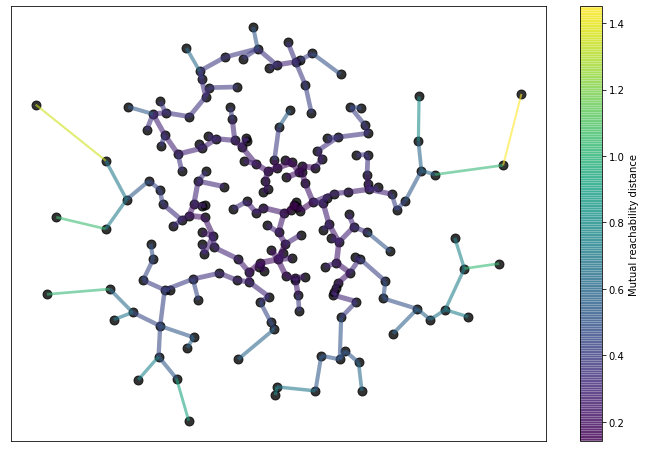

In [49]:
hdbscan = HDBSCAN(min_cluster_size=3, min_samples = 5, gen_min_span_tree=True)
hdbscan.fit(df[['Feature 1', 'Feature 2']])
plt.figure(figsize = (12,8))
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

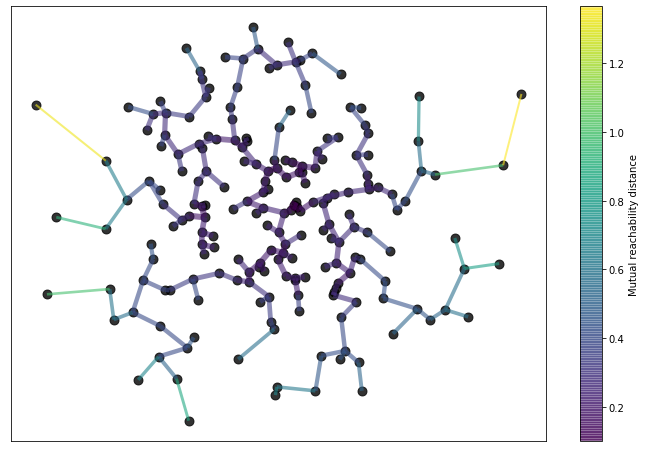

In [40]:
hdbscan = HDBSCAN(min_cluster_size=2, min_samples = 4, gen_min_span_tree=True)
hdbscan.fit(df[['Feature 1', 'Feature 2']])
plt.figure(figsize = (12,8))
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

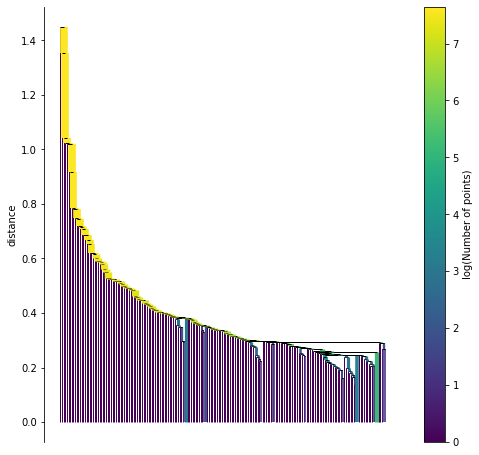

In [50]:
plt.figure(figsize = (8,8))
hdbscan.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

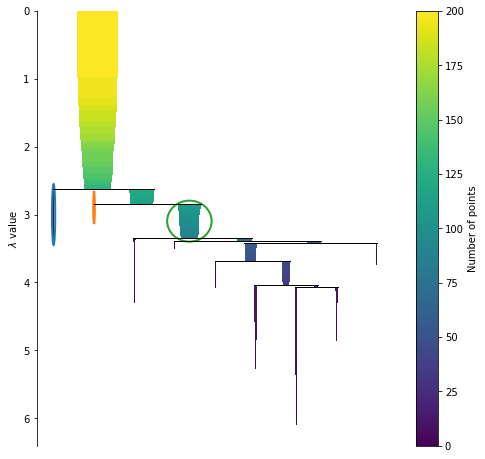

In [51]:
plt.figure(figsize = (8,8))
hdbscan.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [43]:
score = []

for i in range(2, 50):
    for j in range(2, 50): 
        dbscan = HDBSCAN(min_cluster_size=i, min_samples = j).fit(df[['Feature 1', 'Feature 2']])
        labels = dbscan.labels_
        try:
            s_score = silhouette_score(df[['Feature 1', 'Feature 2']], labels)
            print('Average Silhoutte Score for eps = {} and min samples {} is {}'.format(eps, num, s_score))
            score.append({'min_sample': j, 'cluster_size': i, 'score': s_score})
        except:
            print('cluster_size = {} and min samples {} result in only 1 Label'.format(eps, num))

Average Silhoutte Score for eps = 1.0 and min samples 19 is 0.035115272474743116
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.08067215989558545
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.18868195802693422
Average Silhoutte Score for eps = 1.0 and min samples 19 is 0.03193314198890385
Average Silhoutte Score for eps = 1.0 and min samples 19 is 0.08348628808178812
Average Silhoutte Score for eps = 1.0 and min samples 19 is 0.028784476129350565
Average Silhoutte Score for eps = 1.0 and min samples 19 is 0.06290063514841959
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.12086562503386972
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.15760844048999822
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.1825808748403608
Average Silhoutte Score for eps = 1.0 and min samples 19 is 0.0406048111372963
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.17844467004739897
Average Silhoutte Score for eps = 

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.058954390136756685
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.21244238809617155
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.2413011905072885
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and mi

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.12725346258033393
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.20896240749465406
Average Silhoutte Score for eps = 1.0 and min samples 19 is -0.21244238809617155
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and mi

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
Average Silhoutte Score 

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and min samples 19 result in only 1 Label
cluster_size = 1.0 and m

## Clustering Based on KMeans, DBSCAN, and HDBSCAN

In [44]:
kmeans = KMeans(n_clusters=9, random_state = 5)
kmeans.fit(df[['Feature 1', 'Feature 2']])
dfKmeans = pd.DataFrame(data[0], columns = ['Feature 1', 'Feature 2'])
dfKmeans['Category'] = kmeans.labels_

In [45]:
dbscan = DBSCAN(eps=0.3, min_samples = 4).fit(df[['Feature 1', 'Feature 2']])
dfDBSCAN = df.copy()
dfDBSCAN['Category'] = dbscan.labels_

In [46]:
hdbscan = HDBSCAN(min_cluster_size=3, min_samples =5)
hdbscan.fit(df[['Feature 1', 'Feature 2']])
dfHDBSCAN = df.copy()
dfHDBSCAN['Category'] = hdbscan.labels_


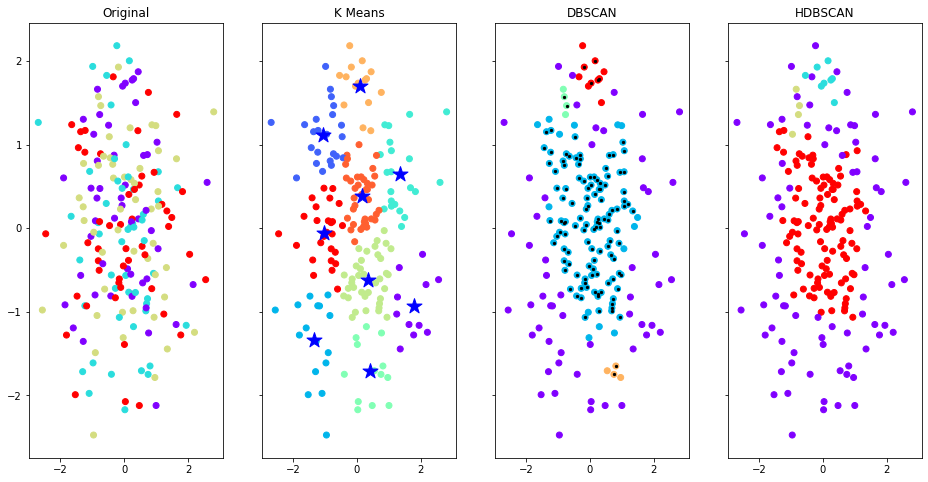

In [47]:
centroids = kmeans.cluster_centers_
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True,figsize=(16,8))

ax1.set_title("Original")
ax1.scatter(df['Feature 1'], df['Feature 2'], c =df['Category'], cmap = 'rainbow')

ax2.set_title('K Means')
ax2.scatter(dfKmeans['Feature 1'], dfKmeans['Feature 2'], c =dfKmeans['Category'], cmap = 'rainbow')
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='b', s=250)

core = dbscan.components_
ax3.set_title('DBSCAN')
ax3.scatter(dfDBSCAN['Feature 1'], dfDBSCAN['Feature 2'], c =dfDBSCAN['Category'], cmap = 'rainbow')
ax3.scatter(core[:, 0], core[:, 1], marker='o', c='black', s=5)

ax4.set_title('HDBSCAN')
ax4.scatter(dfHDBSCAN['Feature 1'], dfHDBSCAN['Feature 2'], c =dfHDBSCAN['Category'], cmap = 'rainbow')

In [48]:
dbscan.components_

array([[-1.35818944,  1.1542133 ],
       [-0.31198858,  0.87368941],
       [-0.72943218,  1.46652177],
       [ 0.85015876,  0.22956533],
       [-0.80822789,  0.06590088],
       [-0.80103326,  1.57346256],
       [-1.03582947, -0.09796089],
       [-1.26760349,  0.77468338],
       [-0.83832853,  0.80446228],
       [-1.22691594,  0.90894557],
       [-0.75564113,  0.47448297],
       [-0.332321  ,  0.59978023],
       [-0.60767972, -0.72922925],
       [-0.73602389,  0.8901986 ],
       [-0.41485953, -0.81109361],
       [-0.55831026,  0.29576636],
       [ 0.24950076, -0.79103104],
       [ 1.03156151,  1.02866117],
       [ 0.92044586, -0.54074967],
       [ 0.75189617, -1.75000942],
       [ 0.58126795, -0.65506156],
       [ 0.01389933,  0.61177798],
       [ 0.28069792, -0.98814199],
       [ 0.55549789,  0.62281151],
       [ 0.14589875, -0.76625545],
       [ 0.93912375, -1.06619359],
       [-1.03308414,  0.47874848],
       [-0.80624159, -0.2472991 ],
       [-1.07603873,